In [220]:
import gym
import torch
import gym_nav
import numpy as np

import sys
sys.path.append('../')
from evaluation import *
from model_evaluation import *
from trajectories import *
%run ../evaluation 

from tqdm import tqdm
import itertools

from representation_analysis import *
from explore_analysis import *
from shortcut_analysis import *
from umap import UMAP
from sklearn.cluster import KMeans

In [229]:
# all_shortcut_use_rates = {}
clone_types = ['cf', 'c']
clone_labels = ['clone_and_freeze', 'clone']
wall_colors = [1.5, 4]
chks = np.arange(40, 480, 20)

for wc in wall_colors:
    for i, clone in enumerate(clone_types):
        for trial in range(3):
            clone_label = clone_labels[i]
            key = f'{clone}_{wc}_{trial}'
            if key in all_shortcut_use_rates:
                continue
            shortcut_use_rates = []
            for chk in tqdm(chks):
                model, obs_rms = load_chk(f'shortcut_wc{wc}p0.1{clone_label}', chk, trial=trial,
                                          subdir='shortcut_clonewc')
                shortcut_use_rates.append(test_shortcut_use_rate(model, obs_rms))

            all_shortcut_use_rates[key] = shortcut_use_rates
            pickle.dump(all_shortcut_use_rates, open('data/shortcut/shortcut_clone_userates', 'wb'))

100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [07:37<00:00, 20.81s/it]


In [271]:
obs_rms.mean.mean

array([0.08756779, 0.05951837, 0.41054027, 0.08105003, 0.05278166,
       0.30854189, 0.0728752 , 0.05162317, 0.4176349 , 0.08737019,
       0.0481067 , 0.32238985, 0.06039012, 0.04370763, 0.42505898,
       0.09353139, 0.04823787, 0.32907402, 0.0482016 , 0.03910283,
       0.42929704, 0.10071211, 0.05223936, 0.33044706, 0.03987561,
       0.03732002, 0.430605  , 0.11007152, 0.05604223, 0.32608562,
       0.03426247, 0.04262575, 0.42967903, 0.12047587, 0.05965089,
       0.31330599, 0.02989493, 0.04587581, 0.43128796, 0.12969699,
       0.06424925, 0.29899505, 0.02725834, 0.04348936, 0.43356935,
       0.14038334, 0.07607138, 0.27922824, 0.02591784, 0.03315381,
       0.43618221, 0.15558162, 0.09049349, 0.25867103, 0.02515083,
       0.02651912, 0.43459768, 0.17308094, 0.09627203, 0.24437941,
       0.02496407, 0.02387134, 0.43026912, 0.19037791, 0.09334768,
       0.23716988, 0.02558806, 0.02212819, 0.42557585, 0.20870357,
       0.08530098, 0.23270336, 0.16424905, 0.15741657, 0.15143

100%|█████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 482.78it/s]


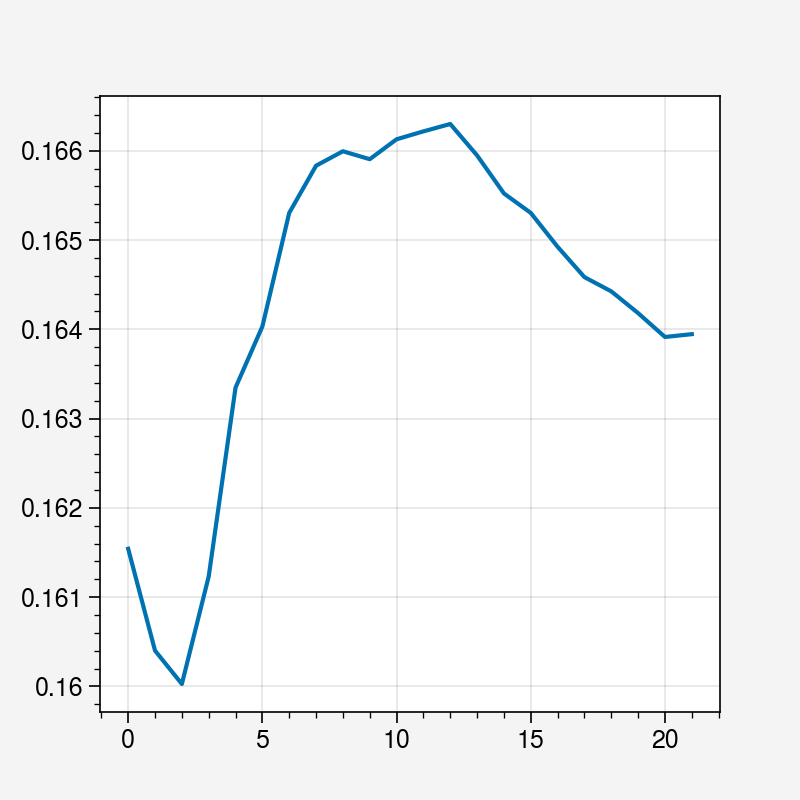

In [272]:
ys = []
for chk in tqdm(chks):
    model, obs_rms = load_chk(f'shortcut_wc{wc}p0.1{clone_label}', chk, trial=trial,
                              subdir='shortcut_clonewc')
    ys.append(obs_rms.mean.mean())
plt.plot(ys)

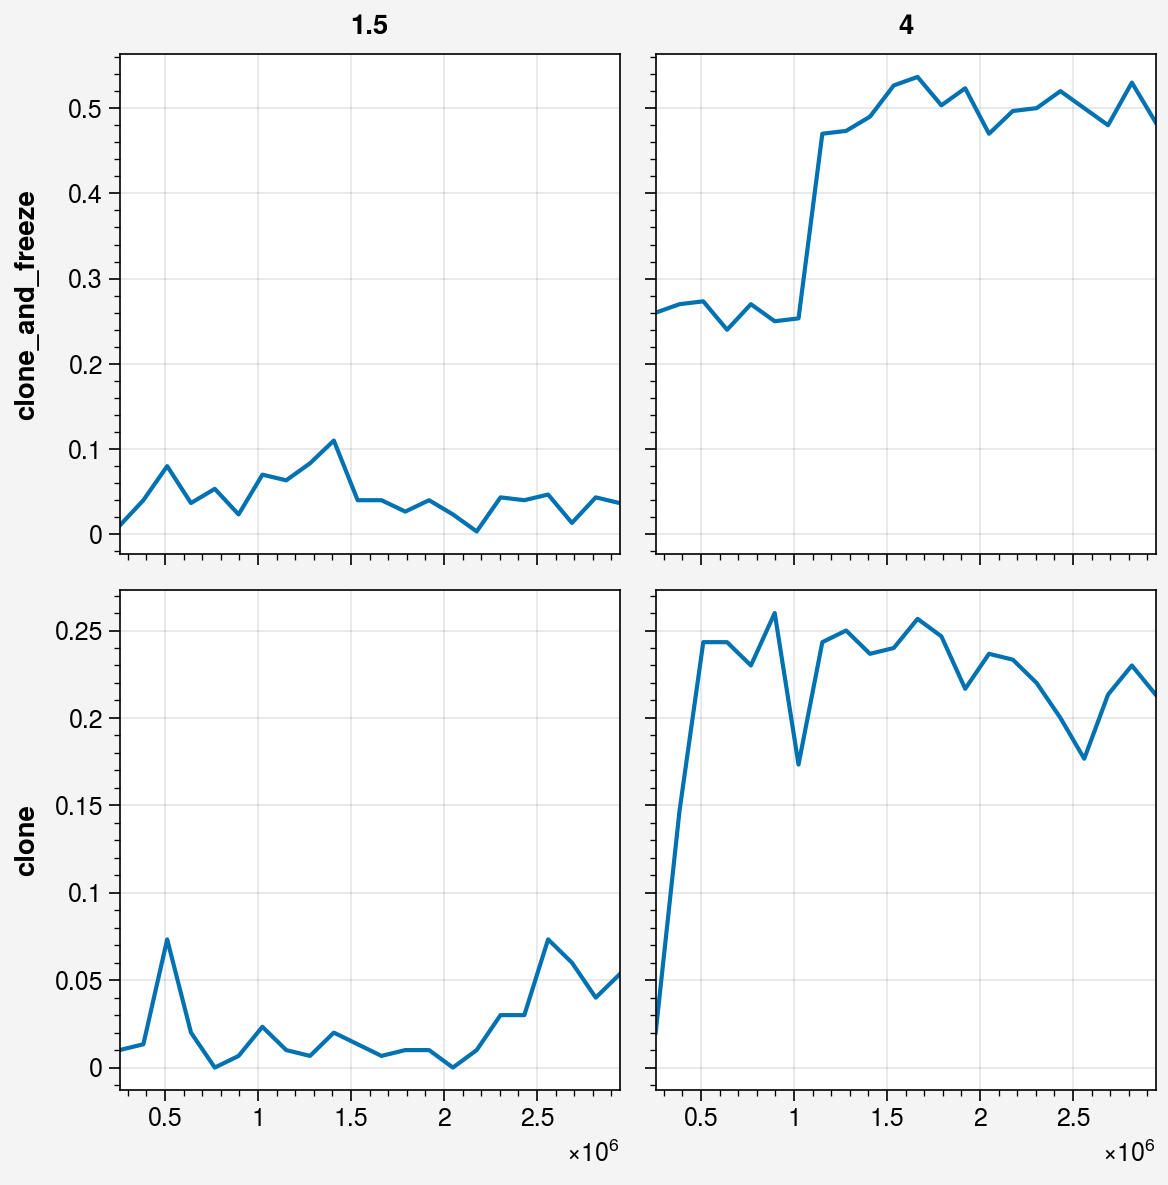

In [233]:
clone_types = ['cf', 'c']
clone_labels = ['clone_and_freeze', 'clone']
wall_colors = [1.5, 4]
chks = np.arange(40, 480, 20)

fig, ax = pplt.subplots(nrows=2, ncols=2)
for i, clone in enumerate(clone_types):
    for j, wc in enumerate(wall_colors):
        
        ys = []
        for trial in range(3):
            key = f'{clone}_{wc}_{trial}'
            ys.append(all_shortcut_use_rates[key])
        ax[i, j].plot(chks*6400, np.mean(ys, axis=0))
        

ax.format(leftlabels=clone_labels, toplabels=[str(wc) for wc in wall_colors])


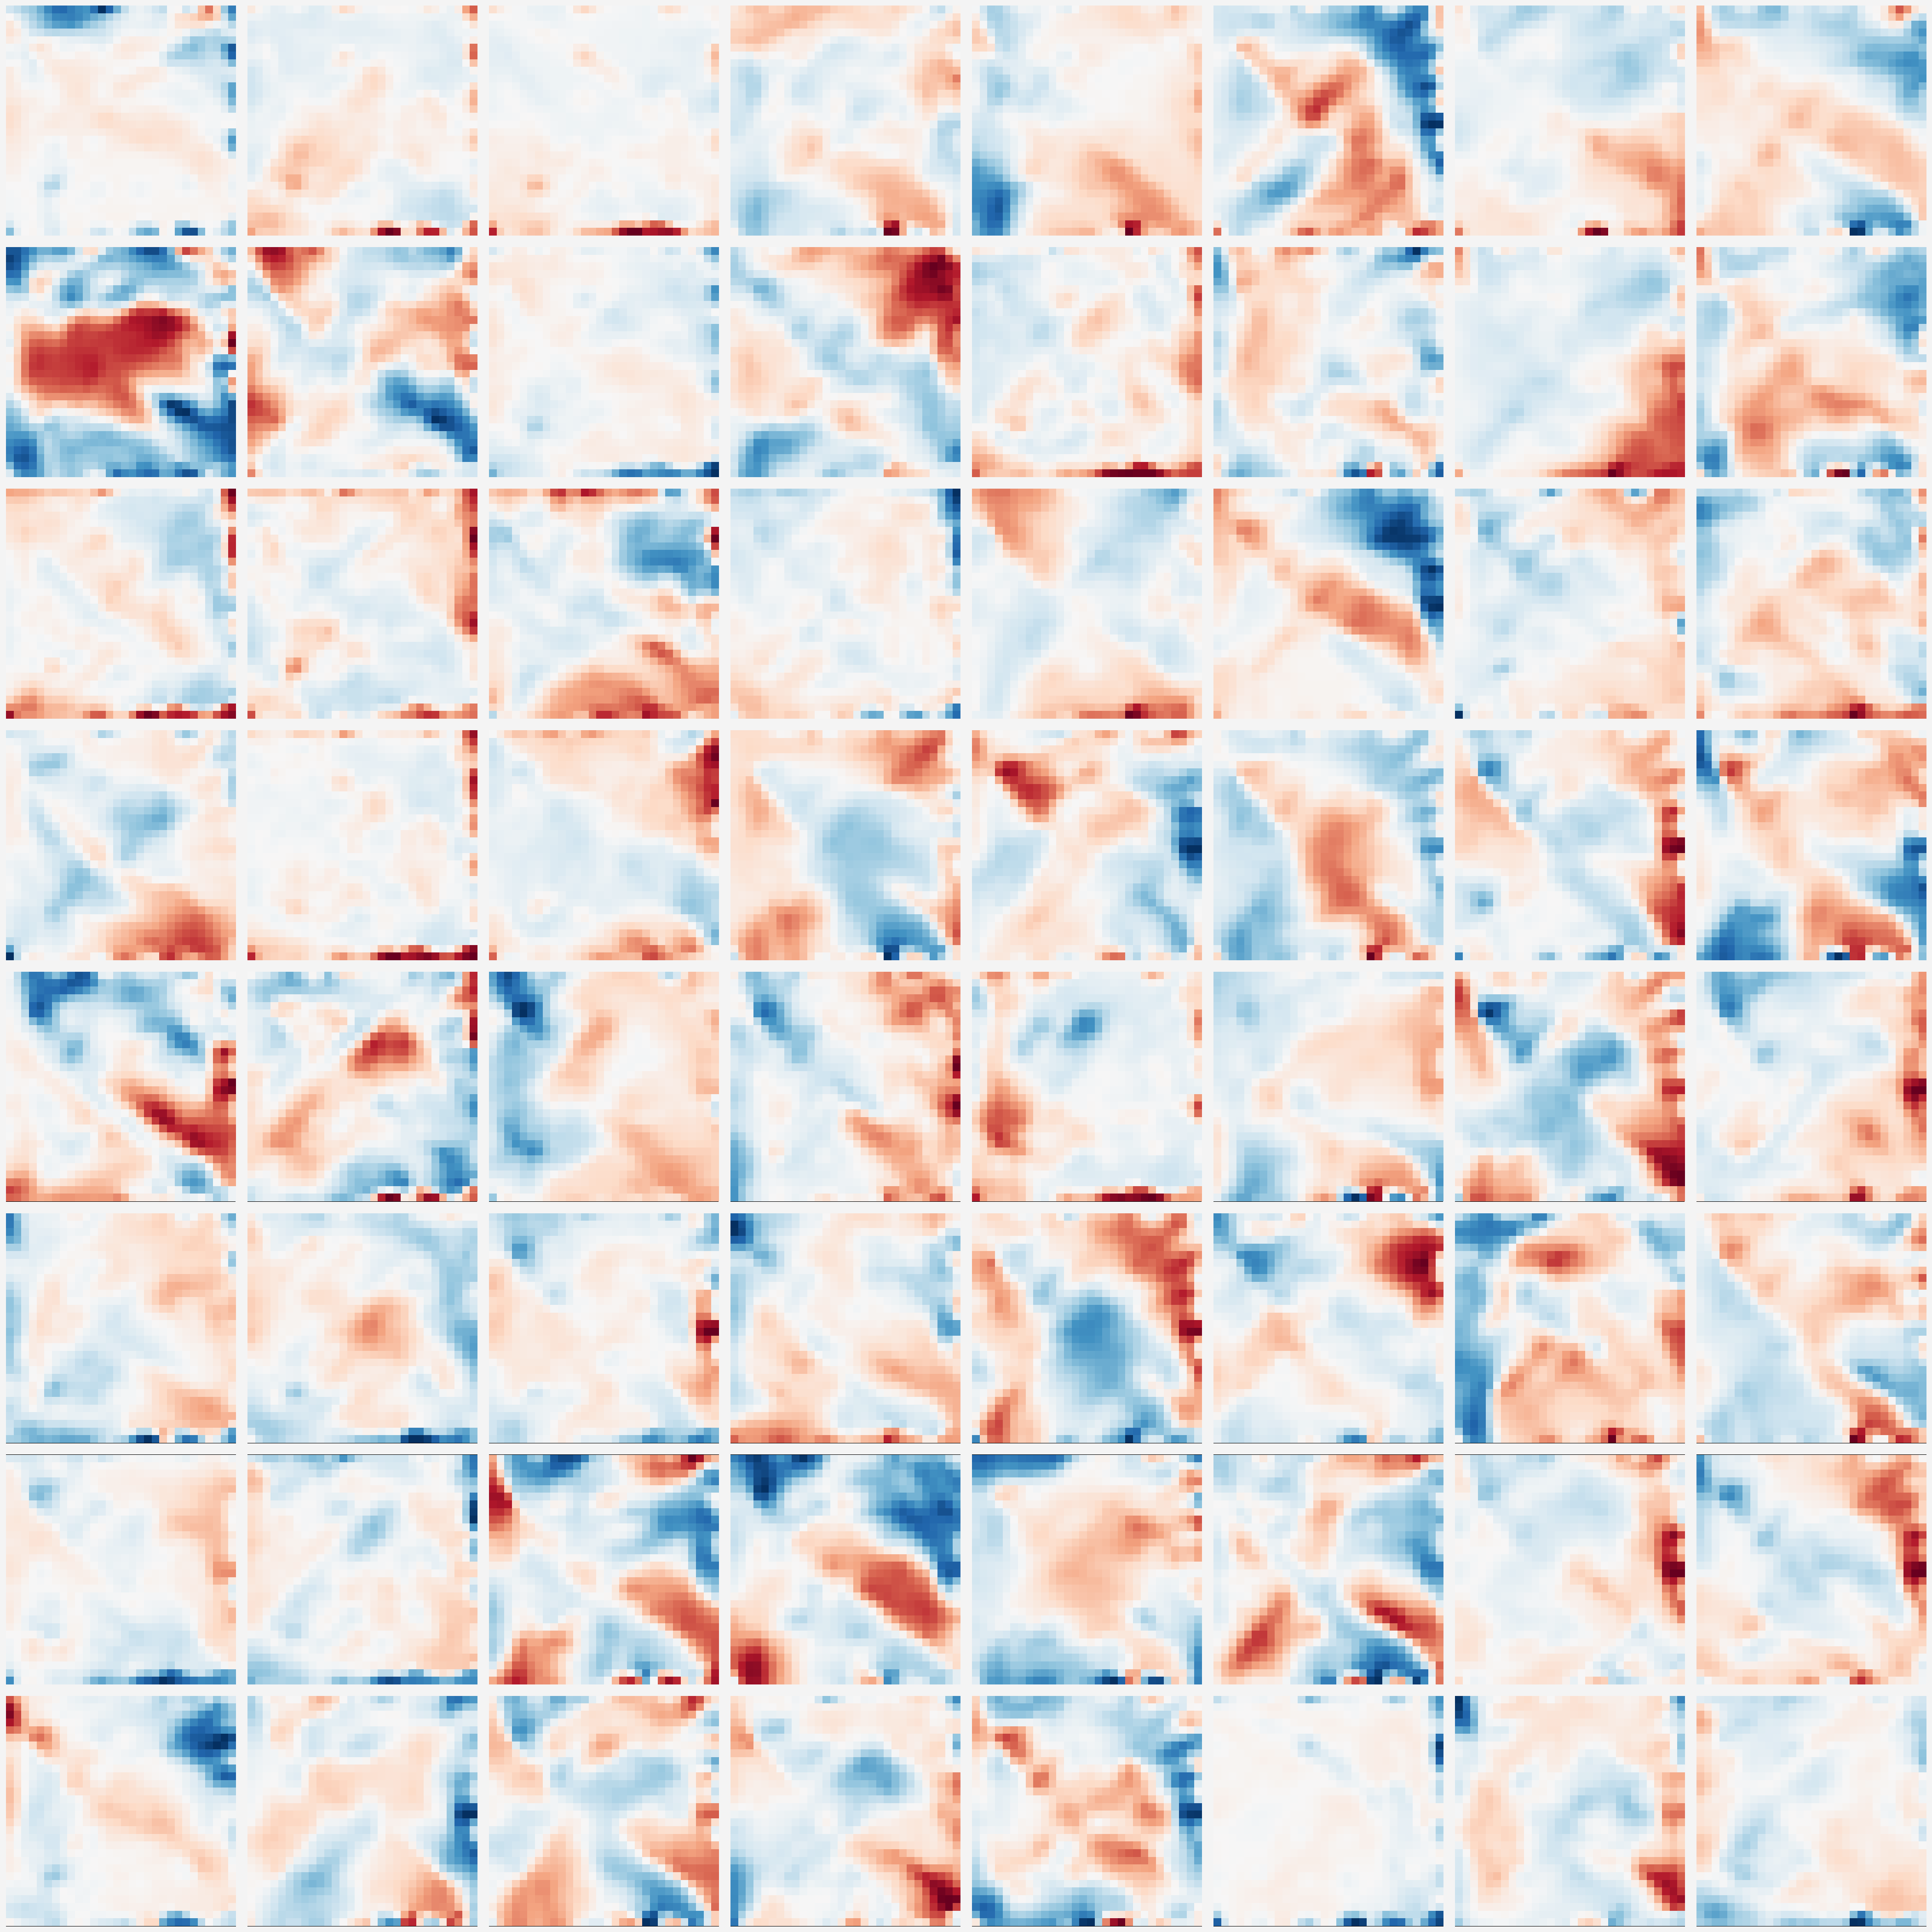

In [9]:
res = pickle.load(open('data/explore/256_2_64_t0_res', 'rb'))
spatial_hms, angle_hms, _ = hm_process_res(res, angle_mod=True)
fig, ax = pplt.subplots(nrows=8, ncols=8)
for i in range(64):
    ax[i].imshow(spatial_hms[i])

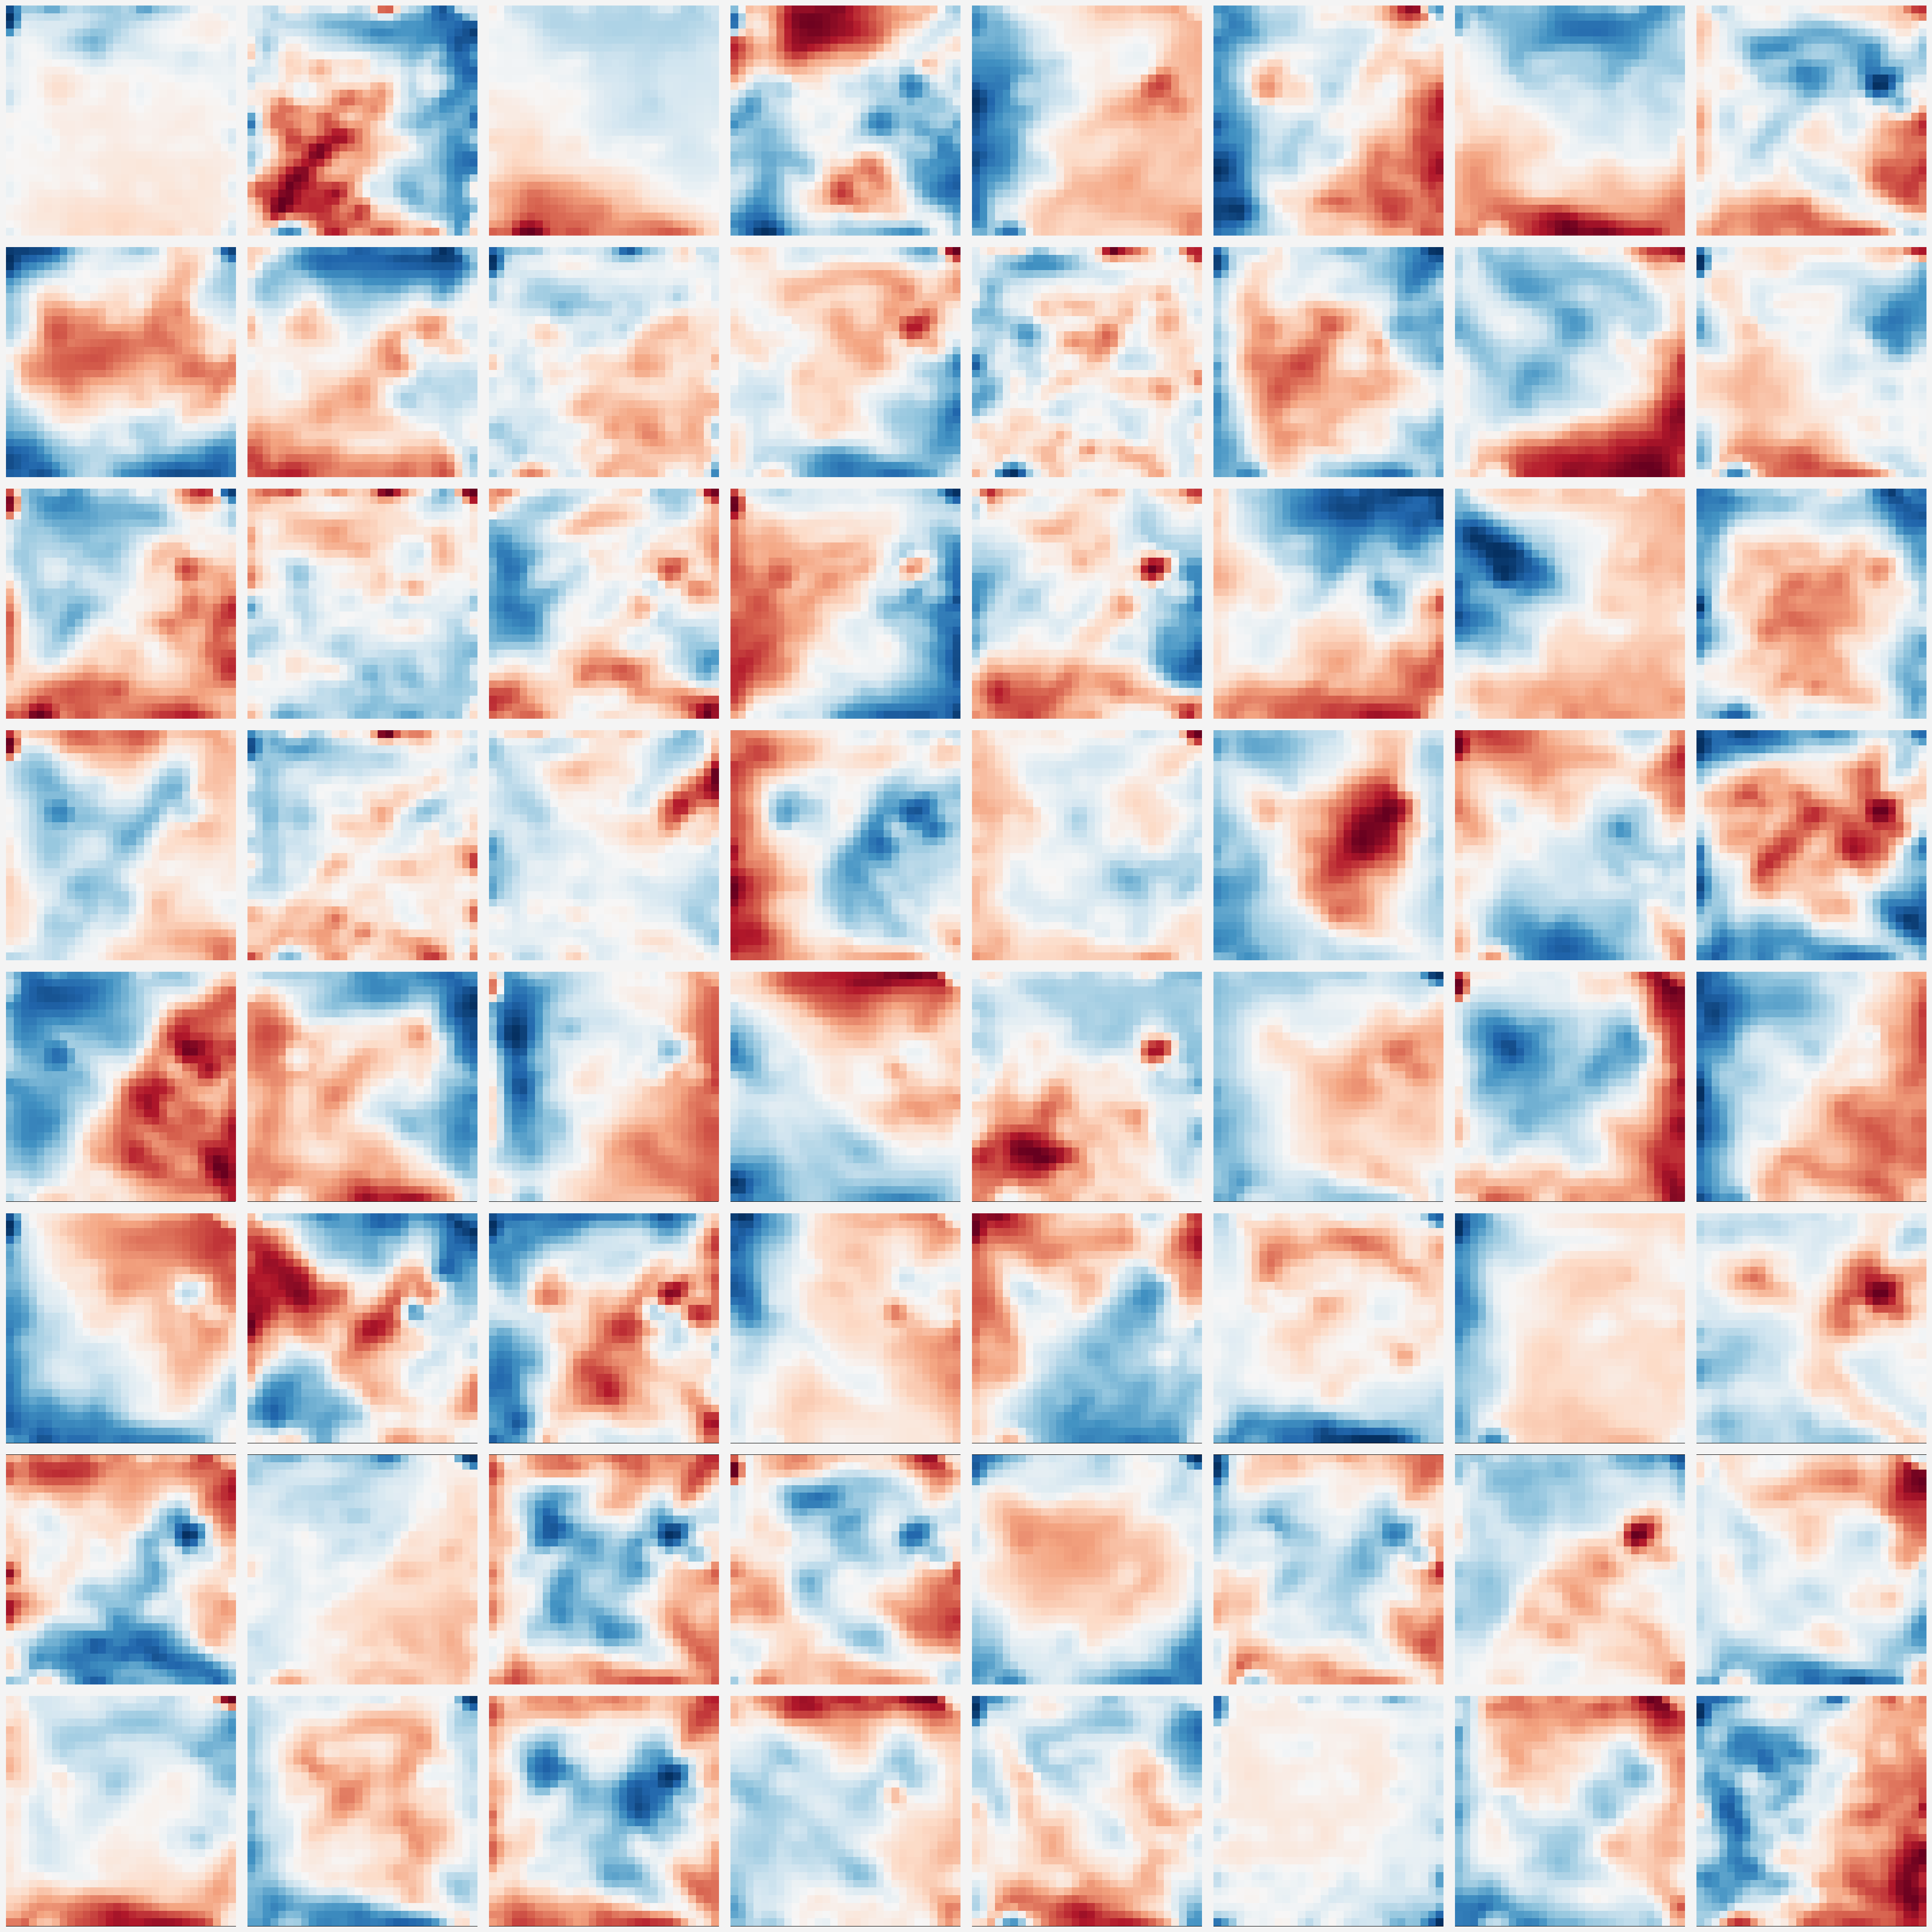

In [11]:
res = pickle.load(open('data/explore/256_2_64_t0_copiedres', 'rb'))
spatial_hms, angle_hms, _ = hm_process_res(res, angle_mod=True)
fig, ax = pplt.subplots(nrows=8, ncols=8)
for i in range(64):
    ax[i].imshow(spatial_hms[i])

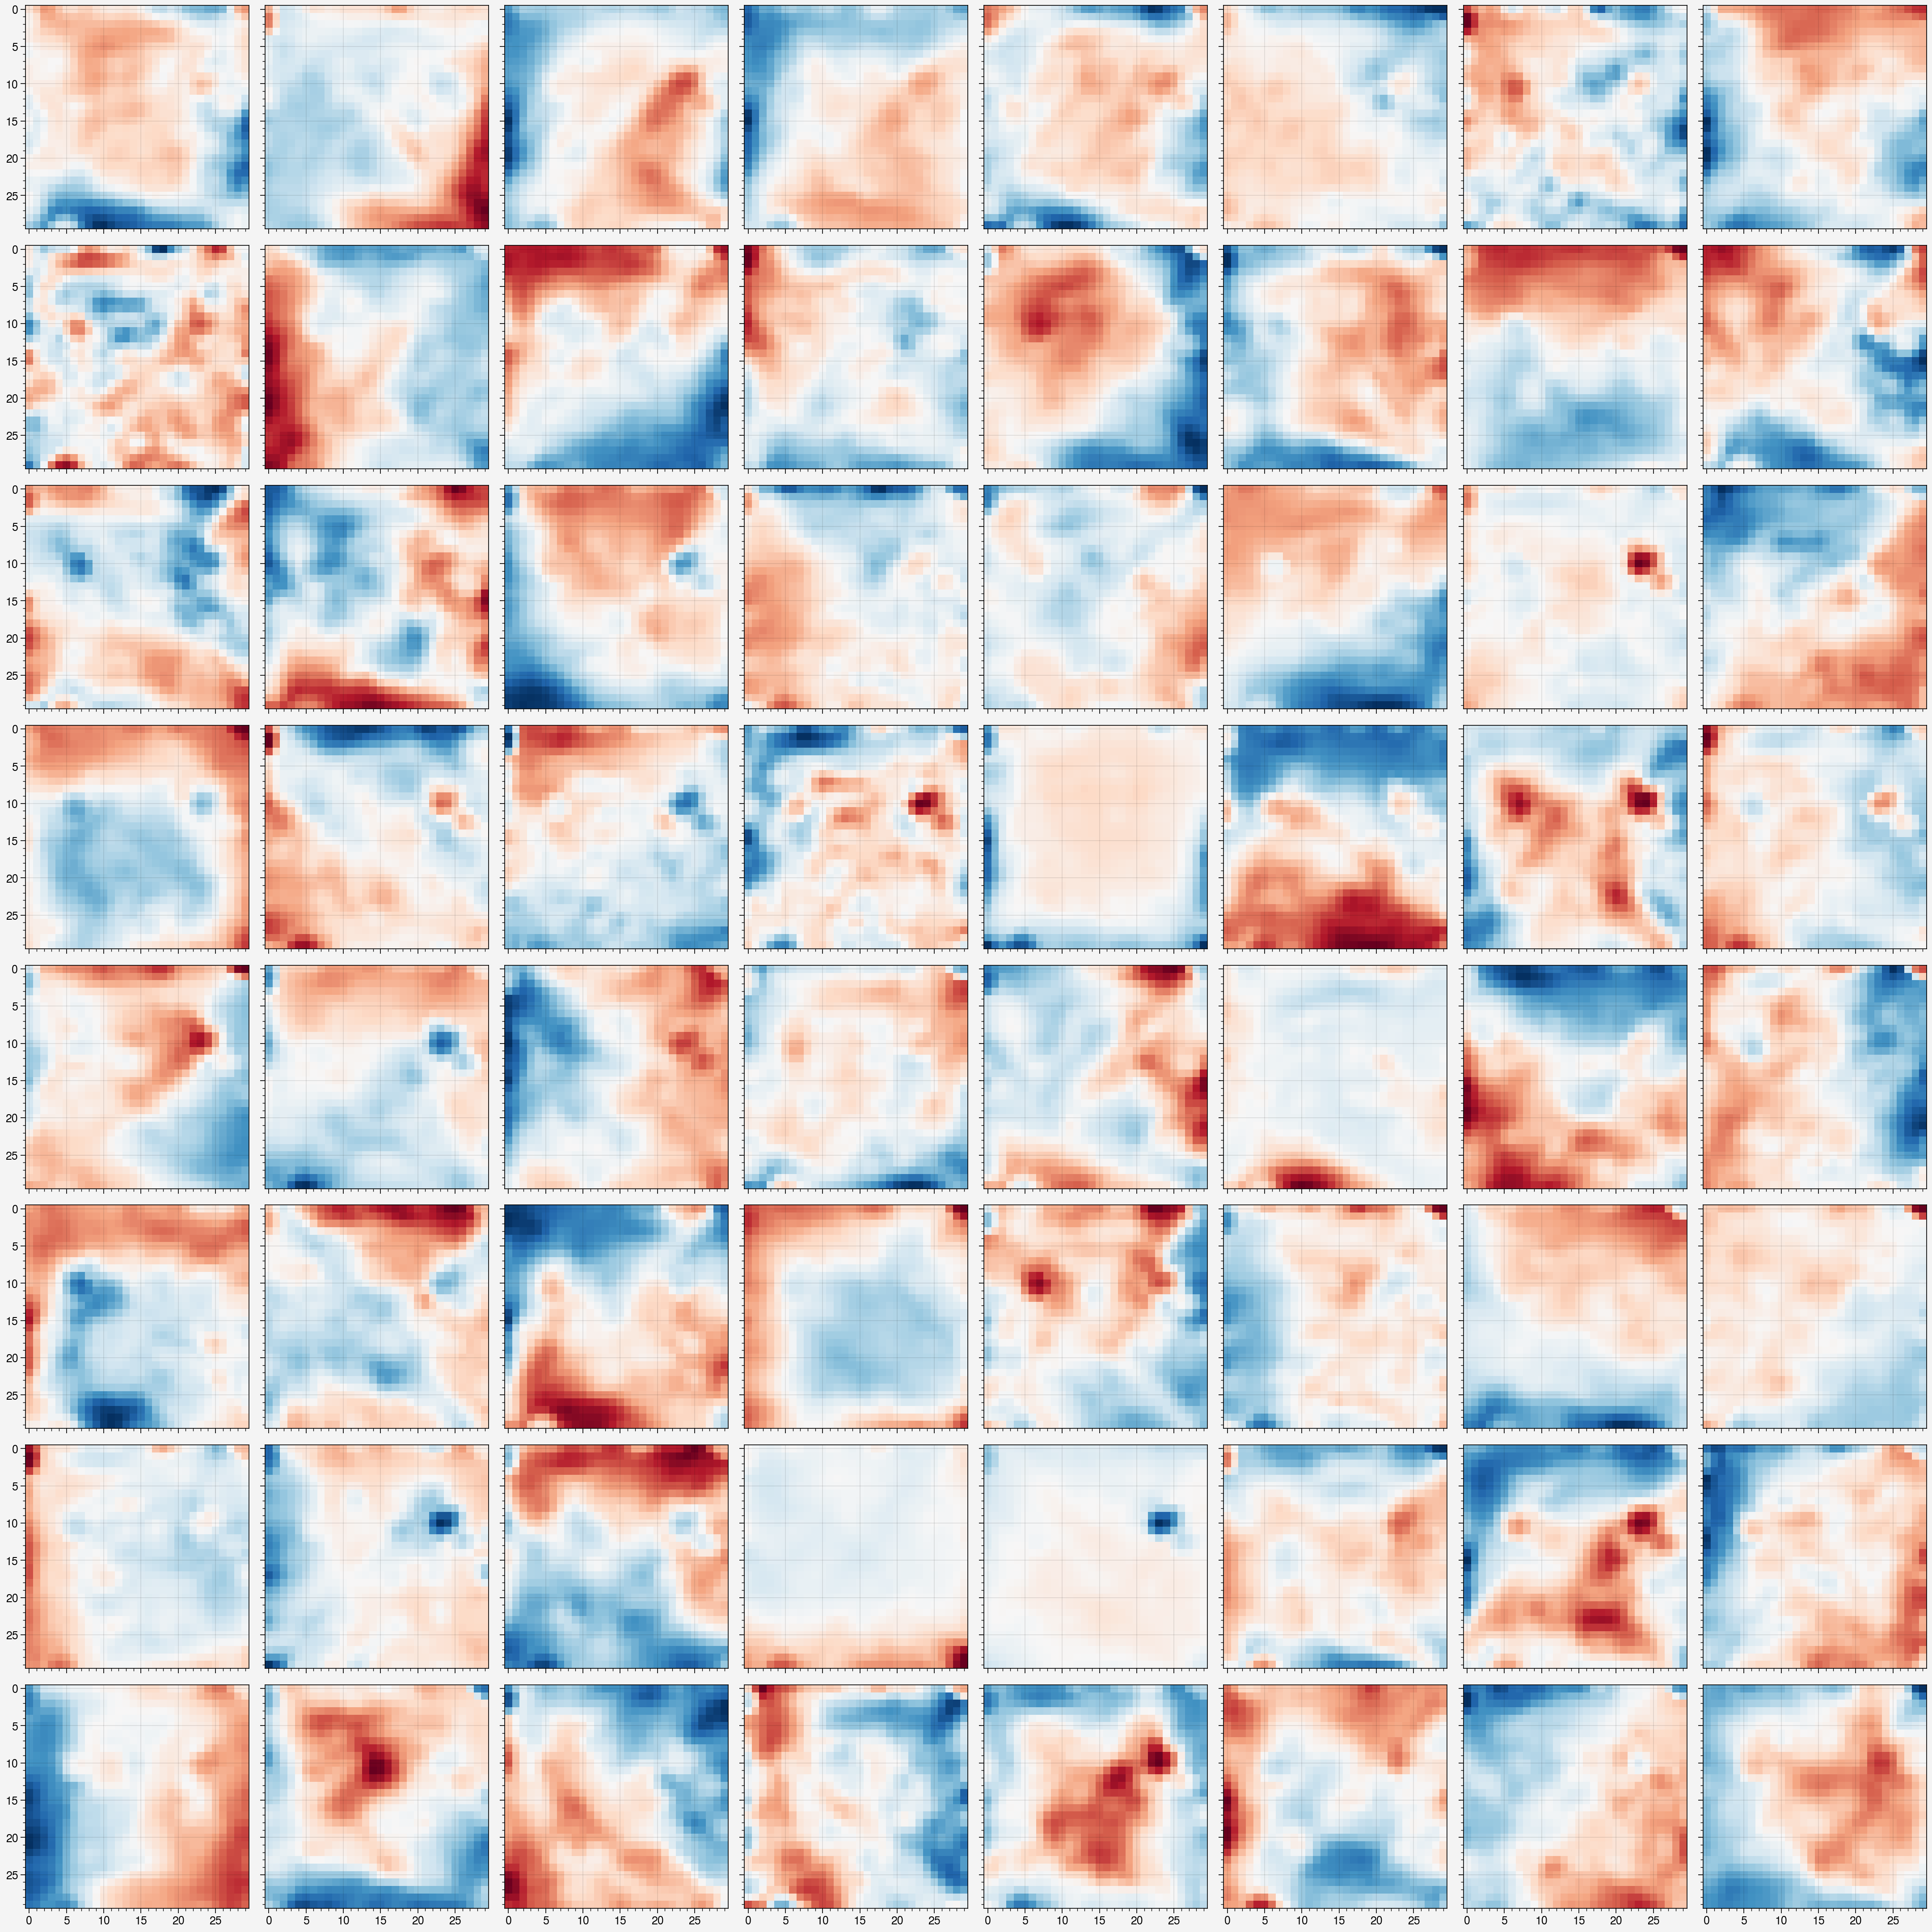

In [55]:
res = pickle.load(open('data/explore/256_2_64_t1_copiedres', 'rb'))
spatial_hms, angle_hms, _ = hm_process_res(res, angle_mod=True)
fig, ax = pplt.subplots(nrows=8, ncols=8)
for i in range(64):
    ax[i].imshow(spatial_hms[i])

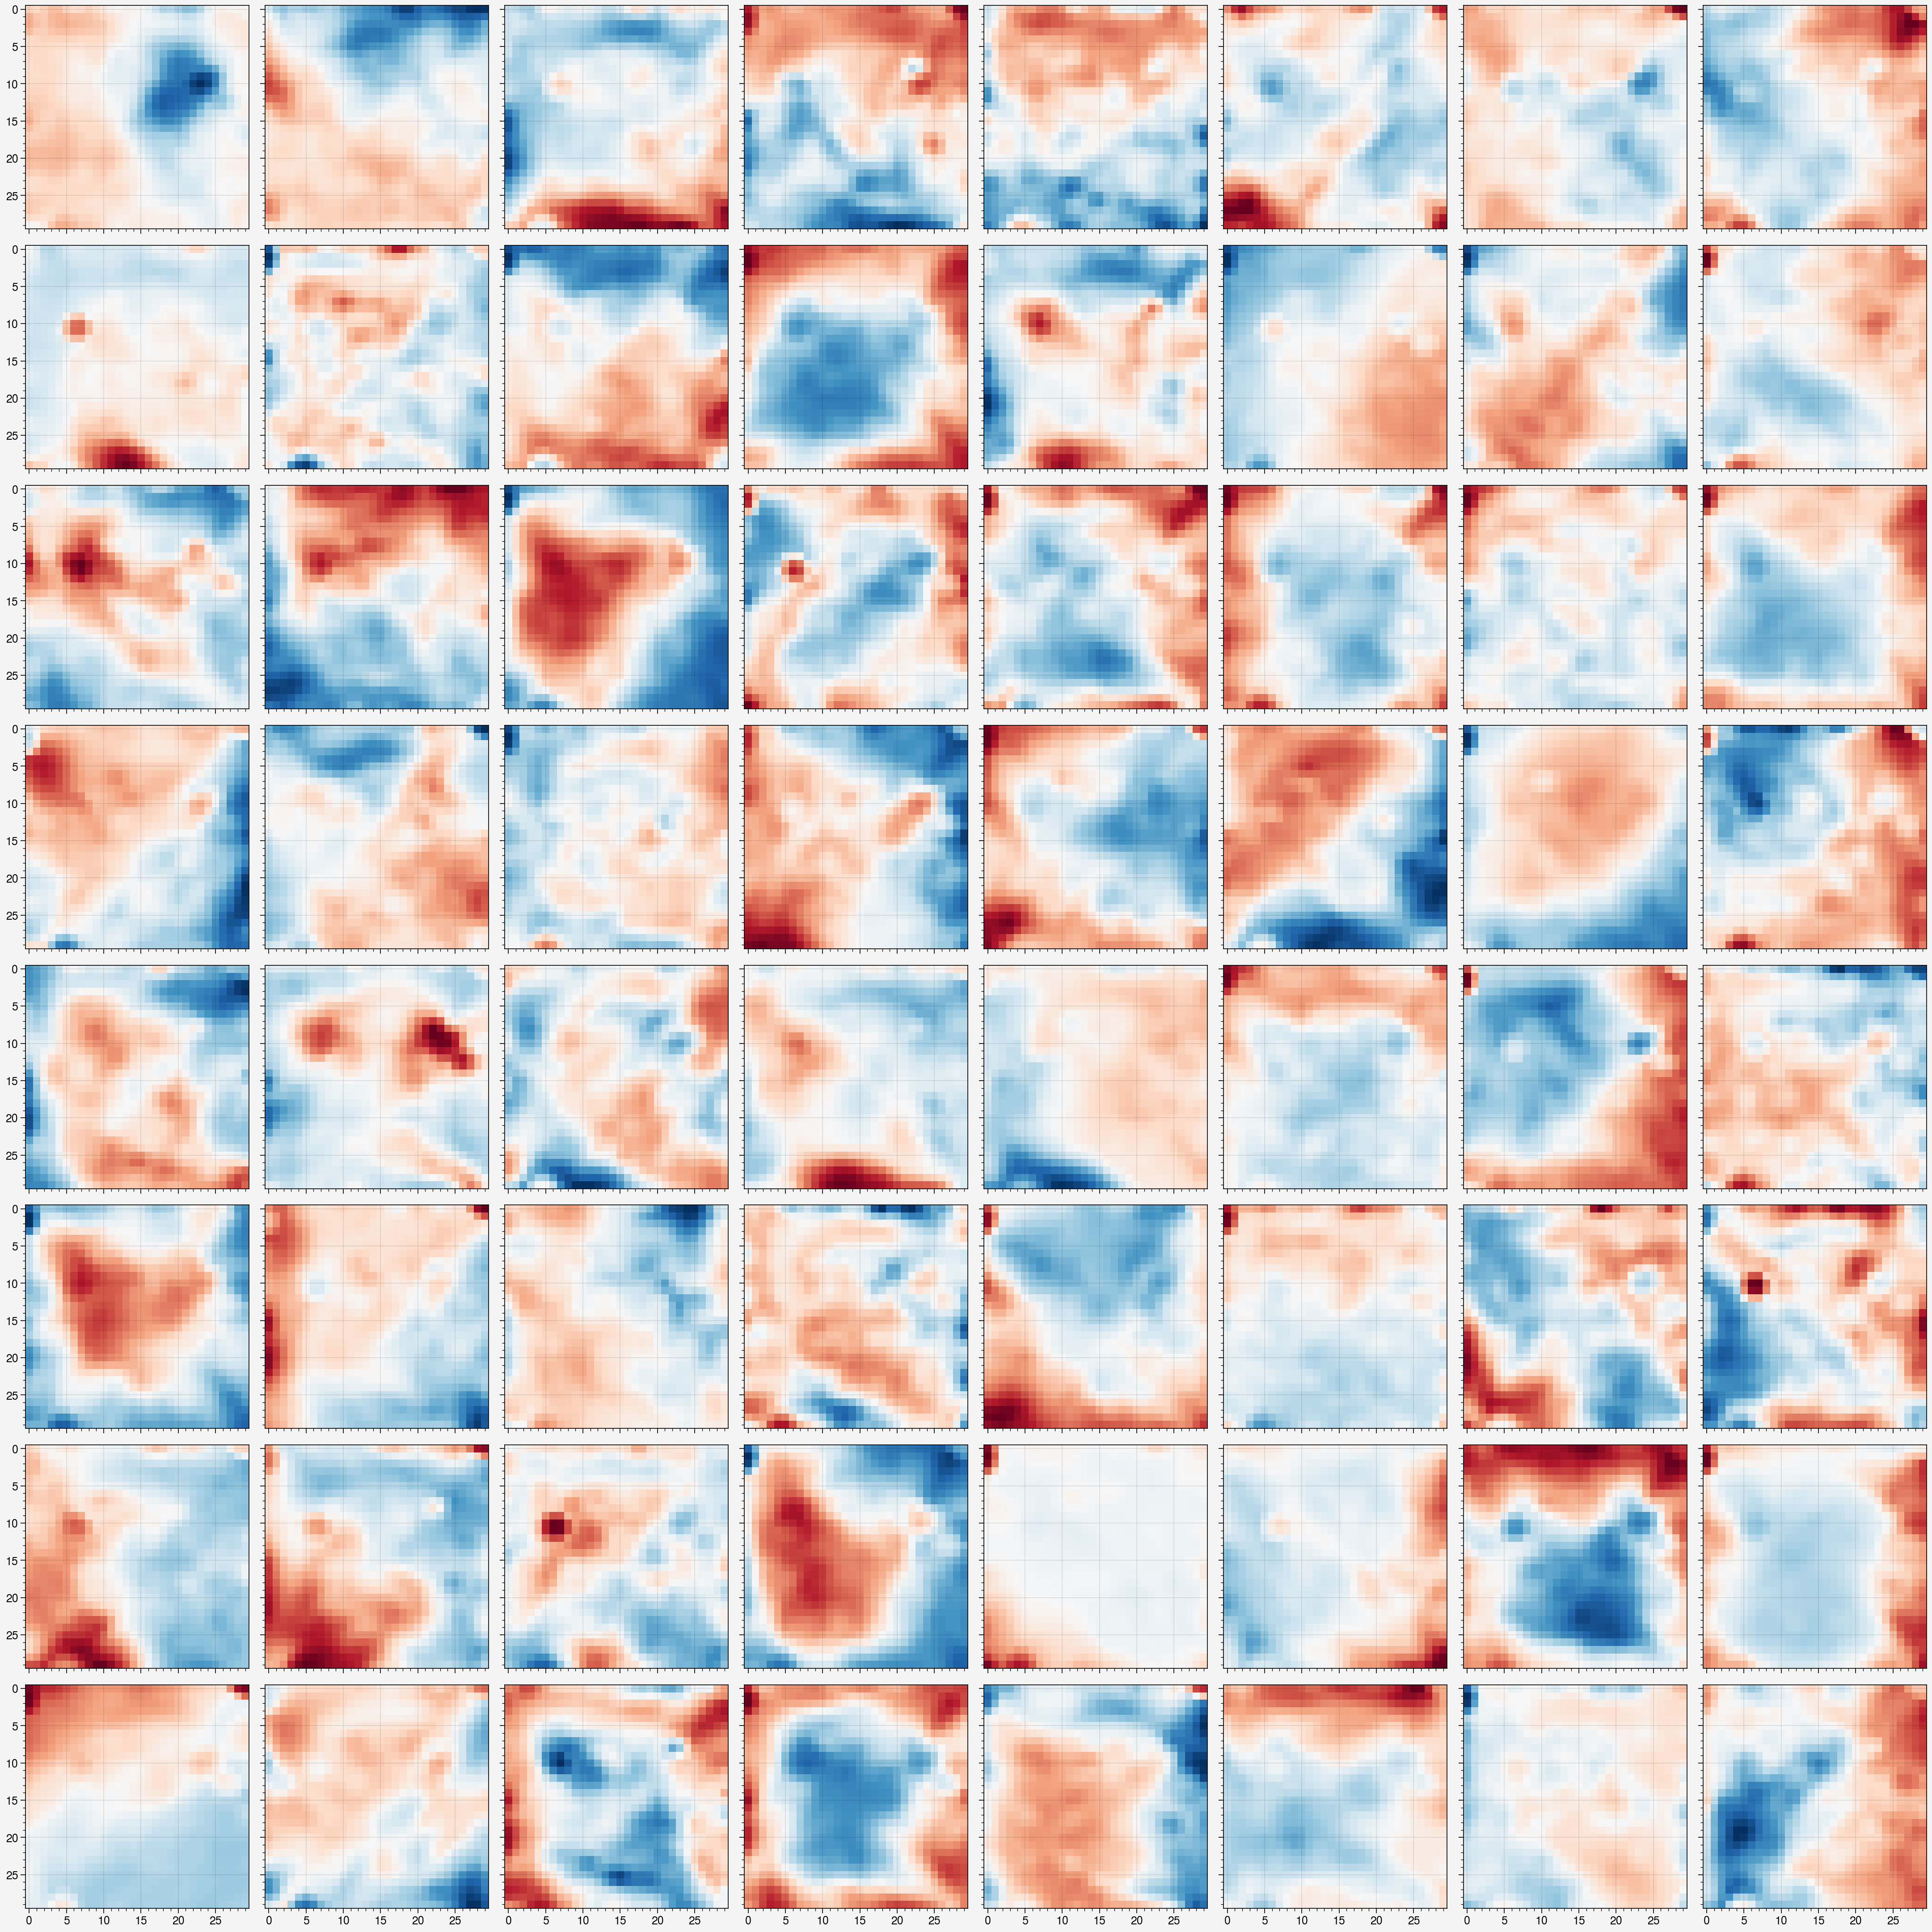

In [56]:
res = pickle.load(open('data/explore/256_2_64_t2_copiedres', 'rb'))
spatial_hms, angle_hms, _ = hm_process_res(res, angle_mod=True)
fig, ax = pplt.subplots(nrows=8, ncols=8)
for i in range(64):
    ax[i].imshow(spatial_hms[i])

In [14]:
res = pickle.load(open('data/explore/256_2_64_t0_res', 'rb'))
res['activations']['shared_activations'].shape

torch.Size([2, 10872, 64])

In [33]:
%run explore_analysis

In [35]:
grid_points, grid_angles = pickle.load(open('data/explore/grid_starts', 'rb'))

obs = 2
trial = 0
exp_name = f'../saved_models/explorenav_pos/expl_goalpos_obs{obs}hidden64longer_t{trial}.pt'
model, obs_rms = torch.load(exp_name)
env_kwargs = get_explore_kwargs(obs_set=2)
effs, trajs, ress = test_search_efficiency(model, obs_rms, env_kwargs=env_kwargs, manual_starts=[grid_points, grid_angles])
res = combine_evaluation_results(ress)
activs = ep_stack_activations(res, combine=True)
res['activations'] = activs

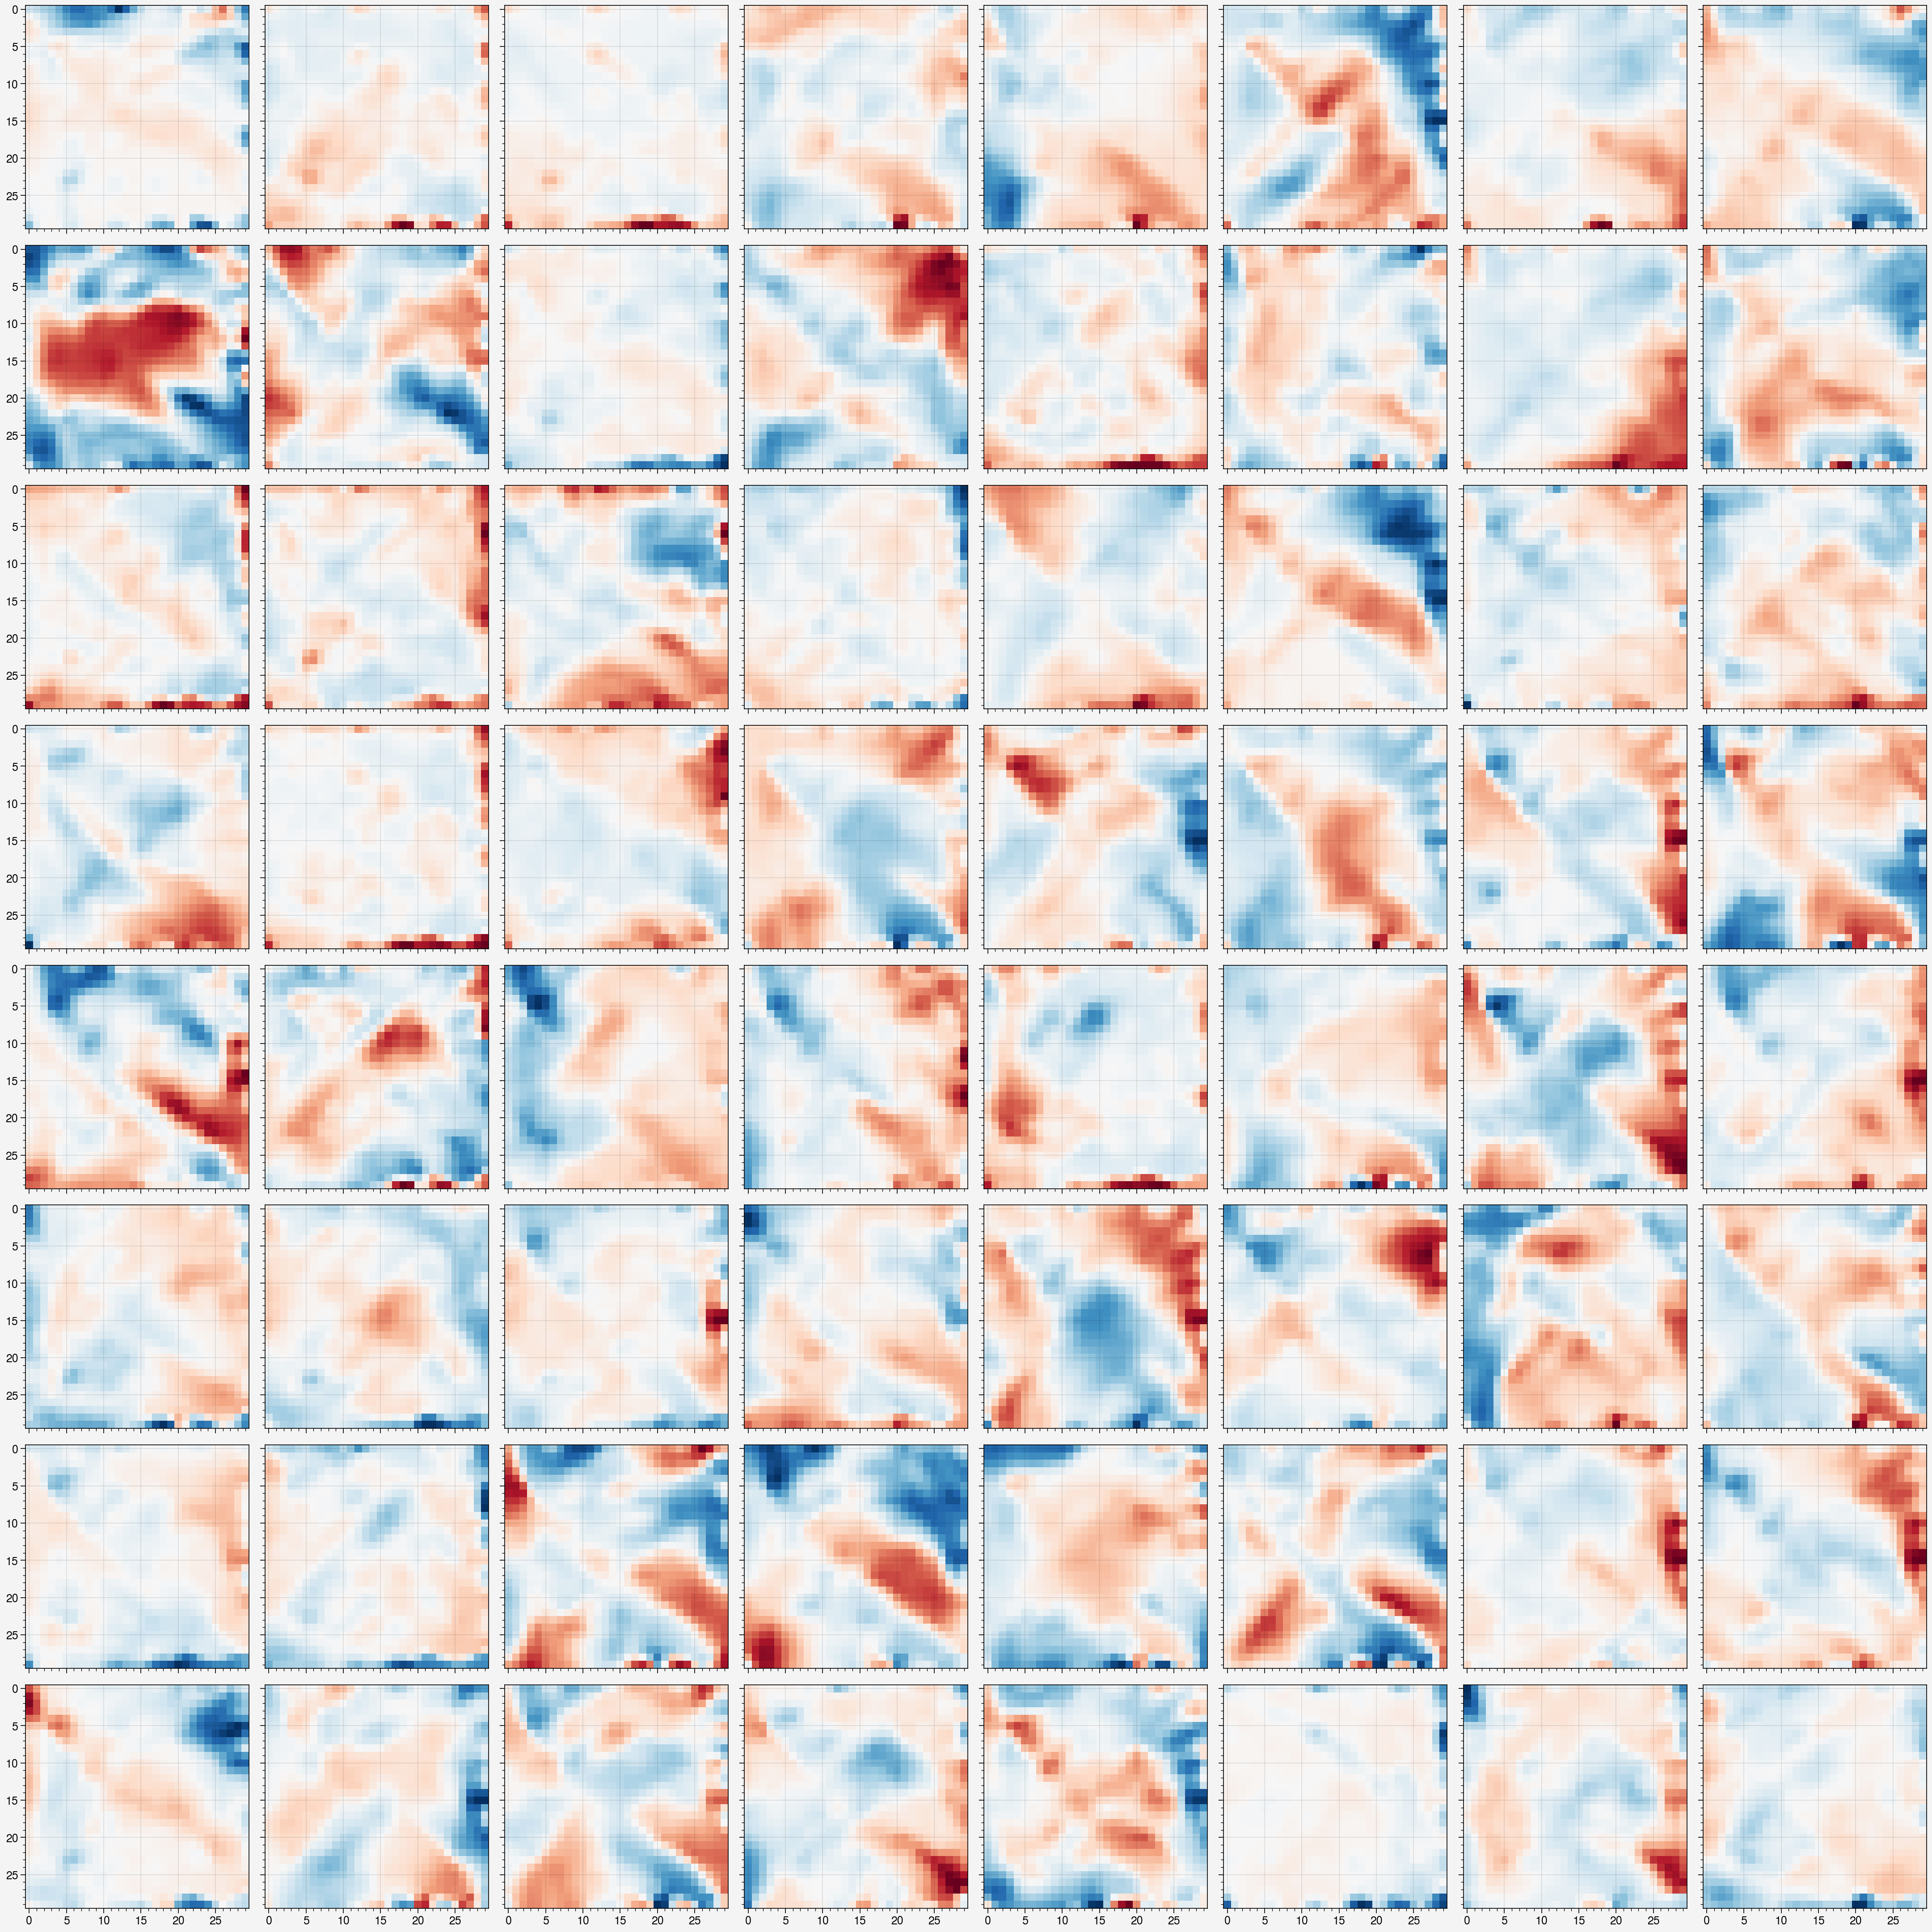

In [52]:
fig, ax = pplt.subplots(nrows=8, ncols=8)
for i in range(64):
    ax[i].imshow(spatial_hms[i])

Gathering data
Processing hms
Plotting hms


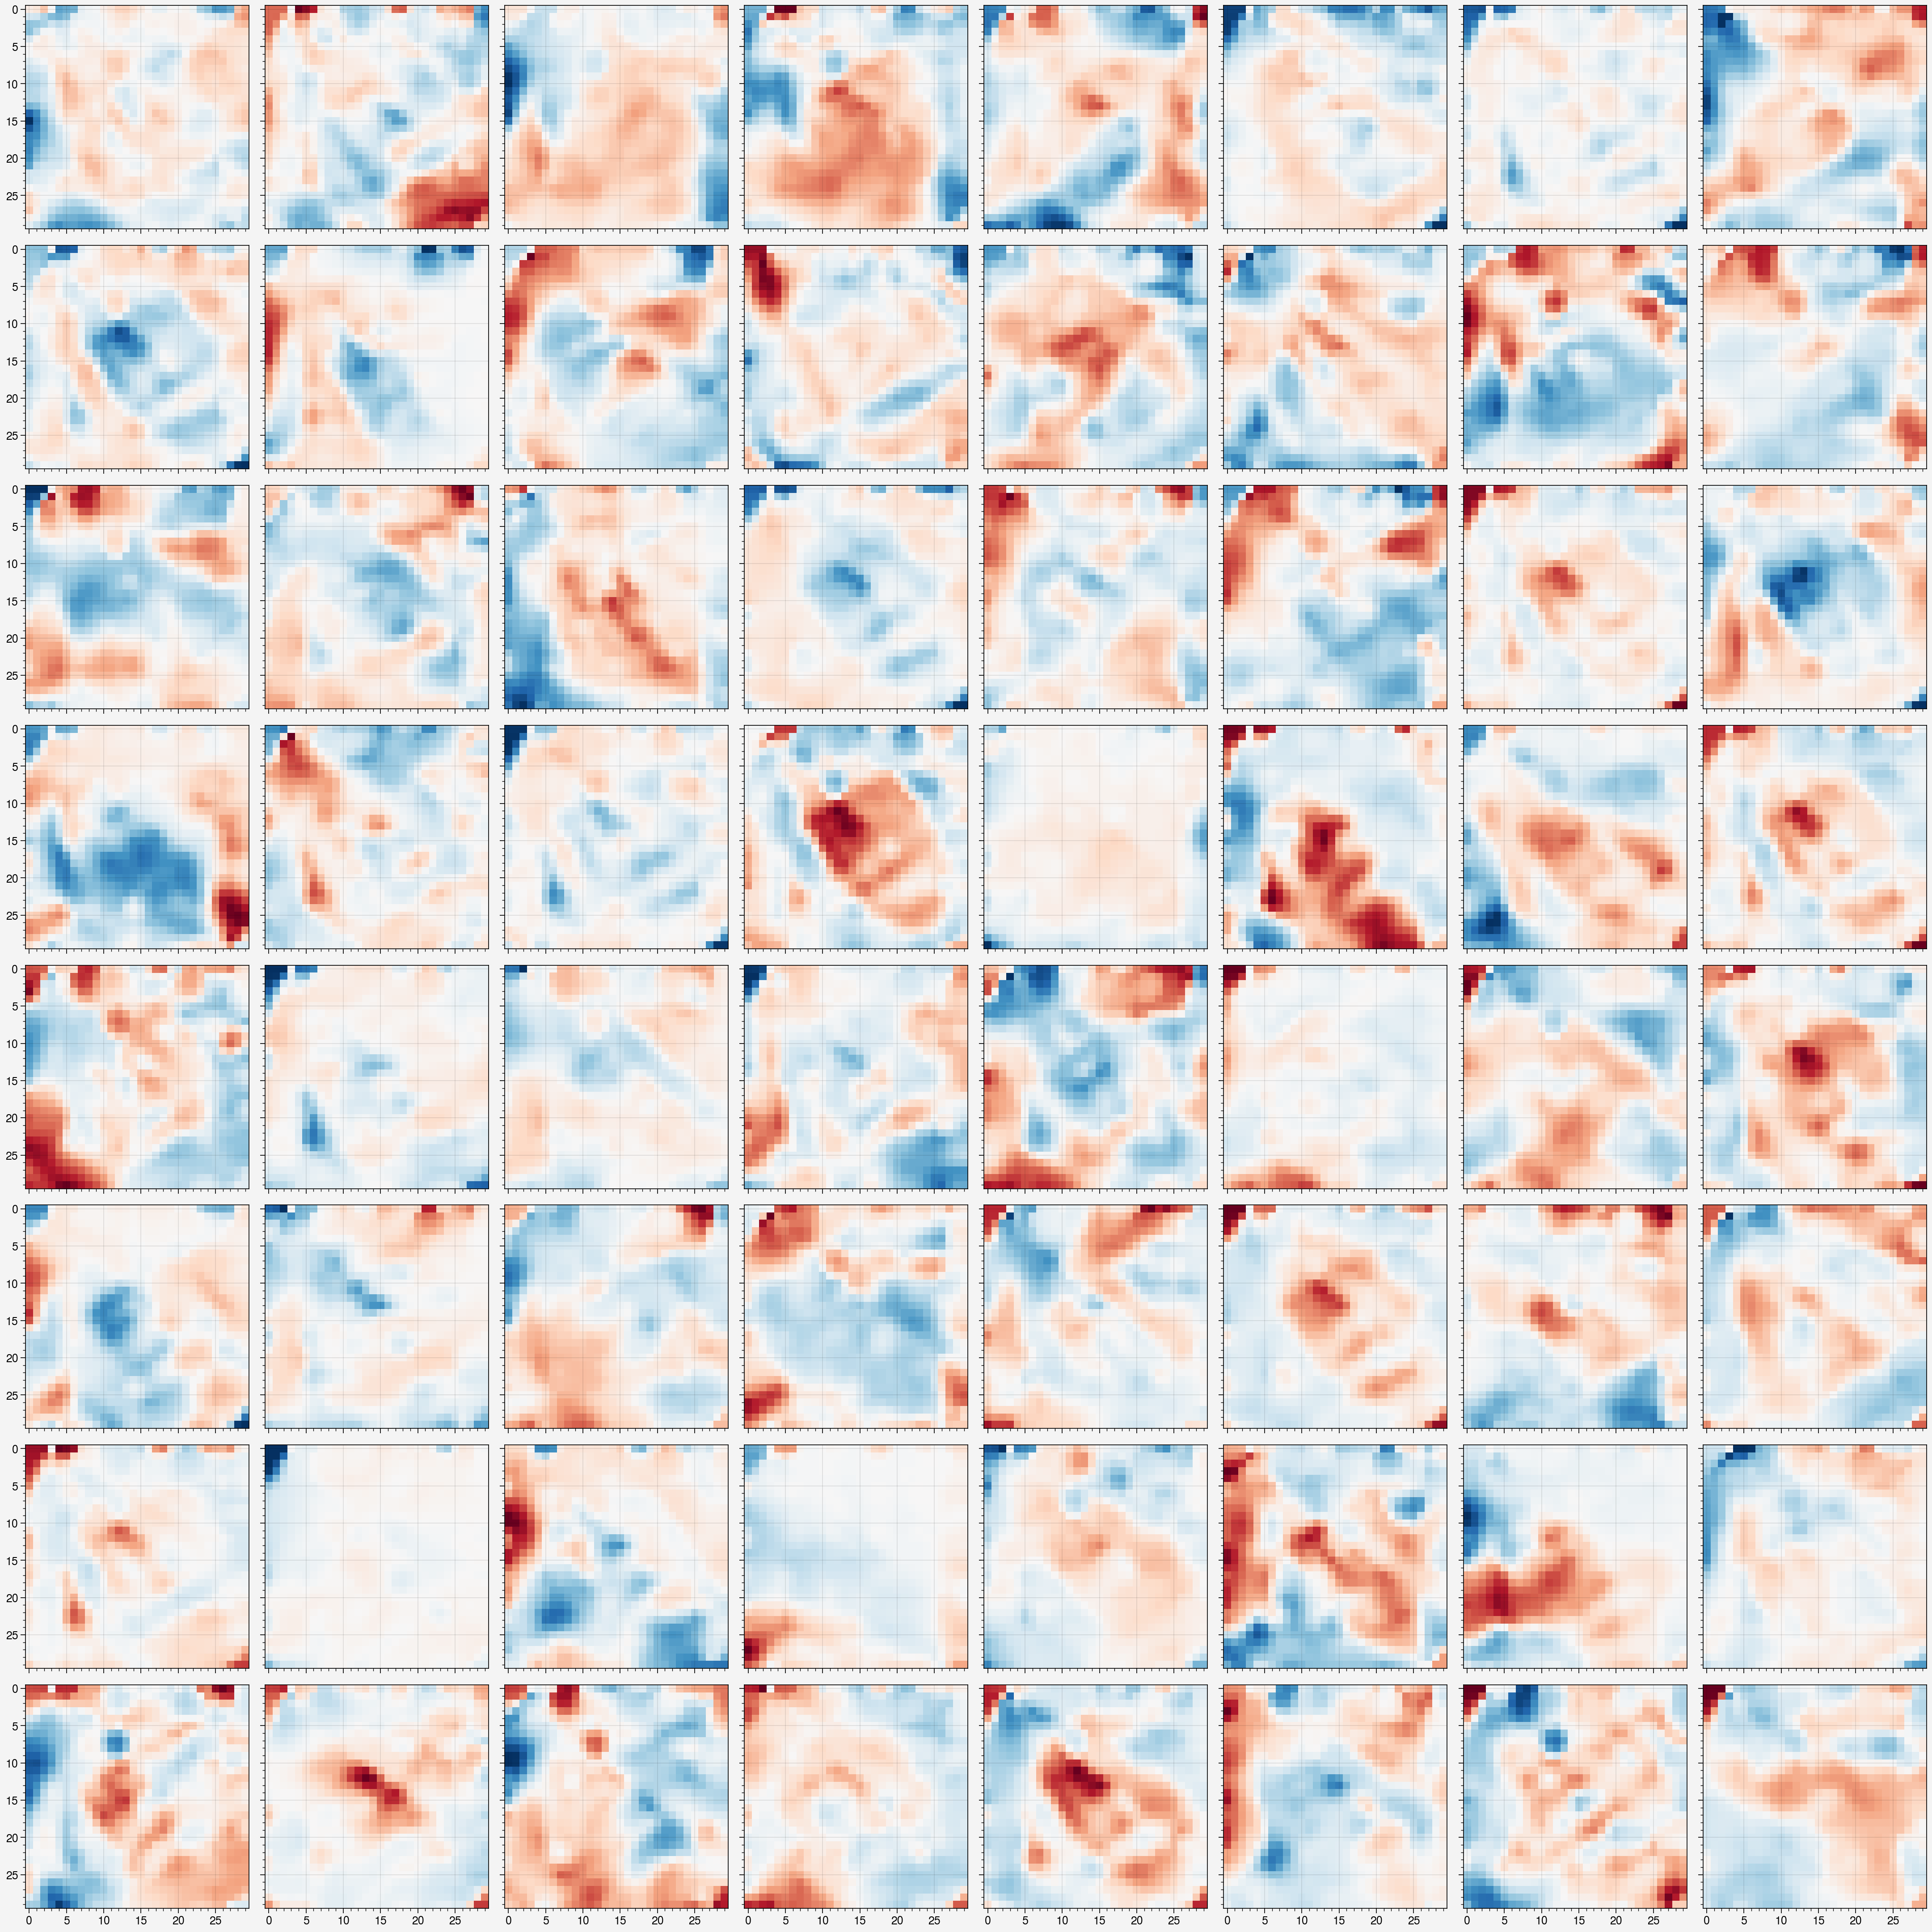

In [53]:
grid_points, grid_angles = pickle.load(open('data/explore/grid_starts', 'rb'))

obs = 2
trial = 1
exp_name = f'../saved_models/explorenav_pos/expl_goalpos_obs{obs}hidden64longer_t{trial}.pt'

print('Gathering data')
model, obs_rms = torch.load(exp_name)
env_kwargs = get_explore_kwargs(obs_set=2)
effs, trajs, ress = test_search_efficiency(model, obs_rms, env_kwargs=env_kwargs, manual_starts=[grid_points, grid_angles])
res = combine_evaluation_results(ress)
activs = ep_stack_activations(res, combine=True)
res['activations'] = activs
del res['envs']

print('Processing hms')
spatial_hms, angle_hms, _ = hm_process_res(res)

print('Plotting hms')
fig, ax = pplt.subplots(nrows=8, ncols=8)
for i in range(64):
    ax[i].imshow(spatial_hms[i])

Gathering data
Processing hms
Plotting hms


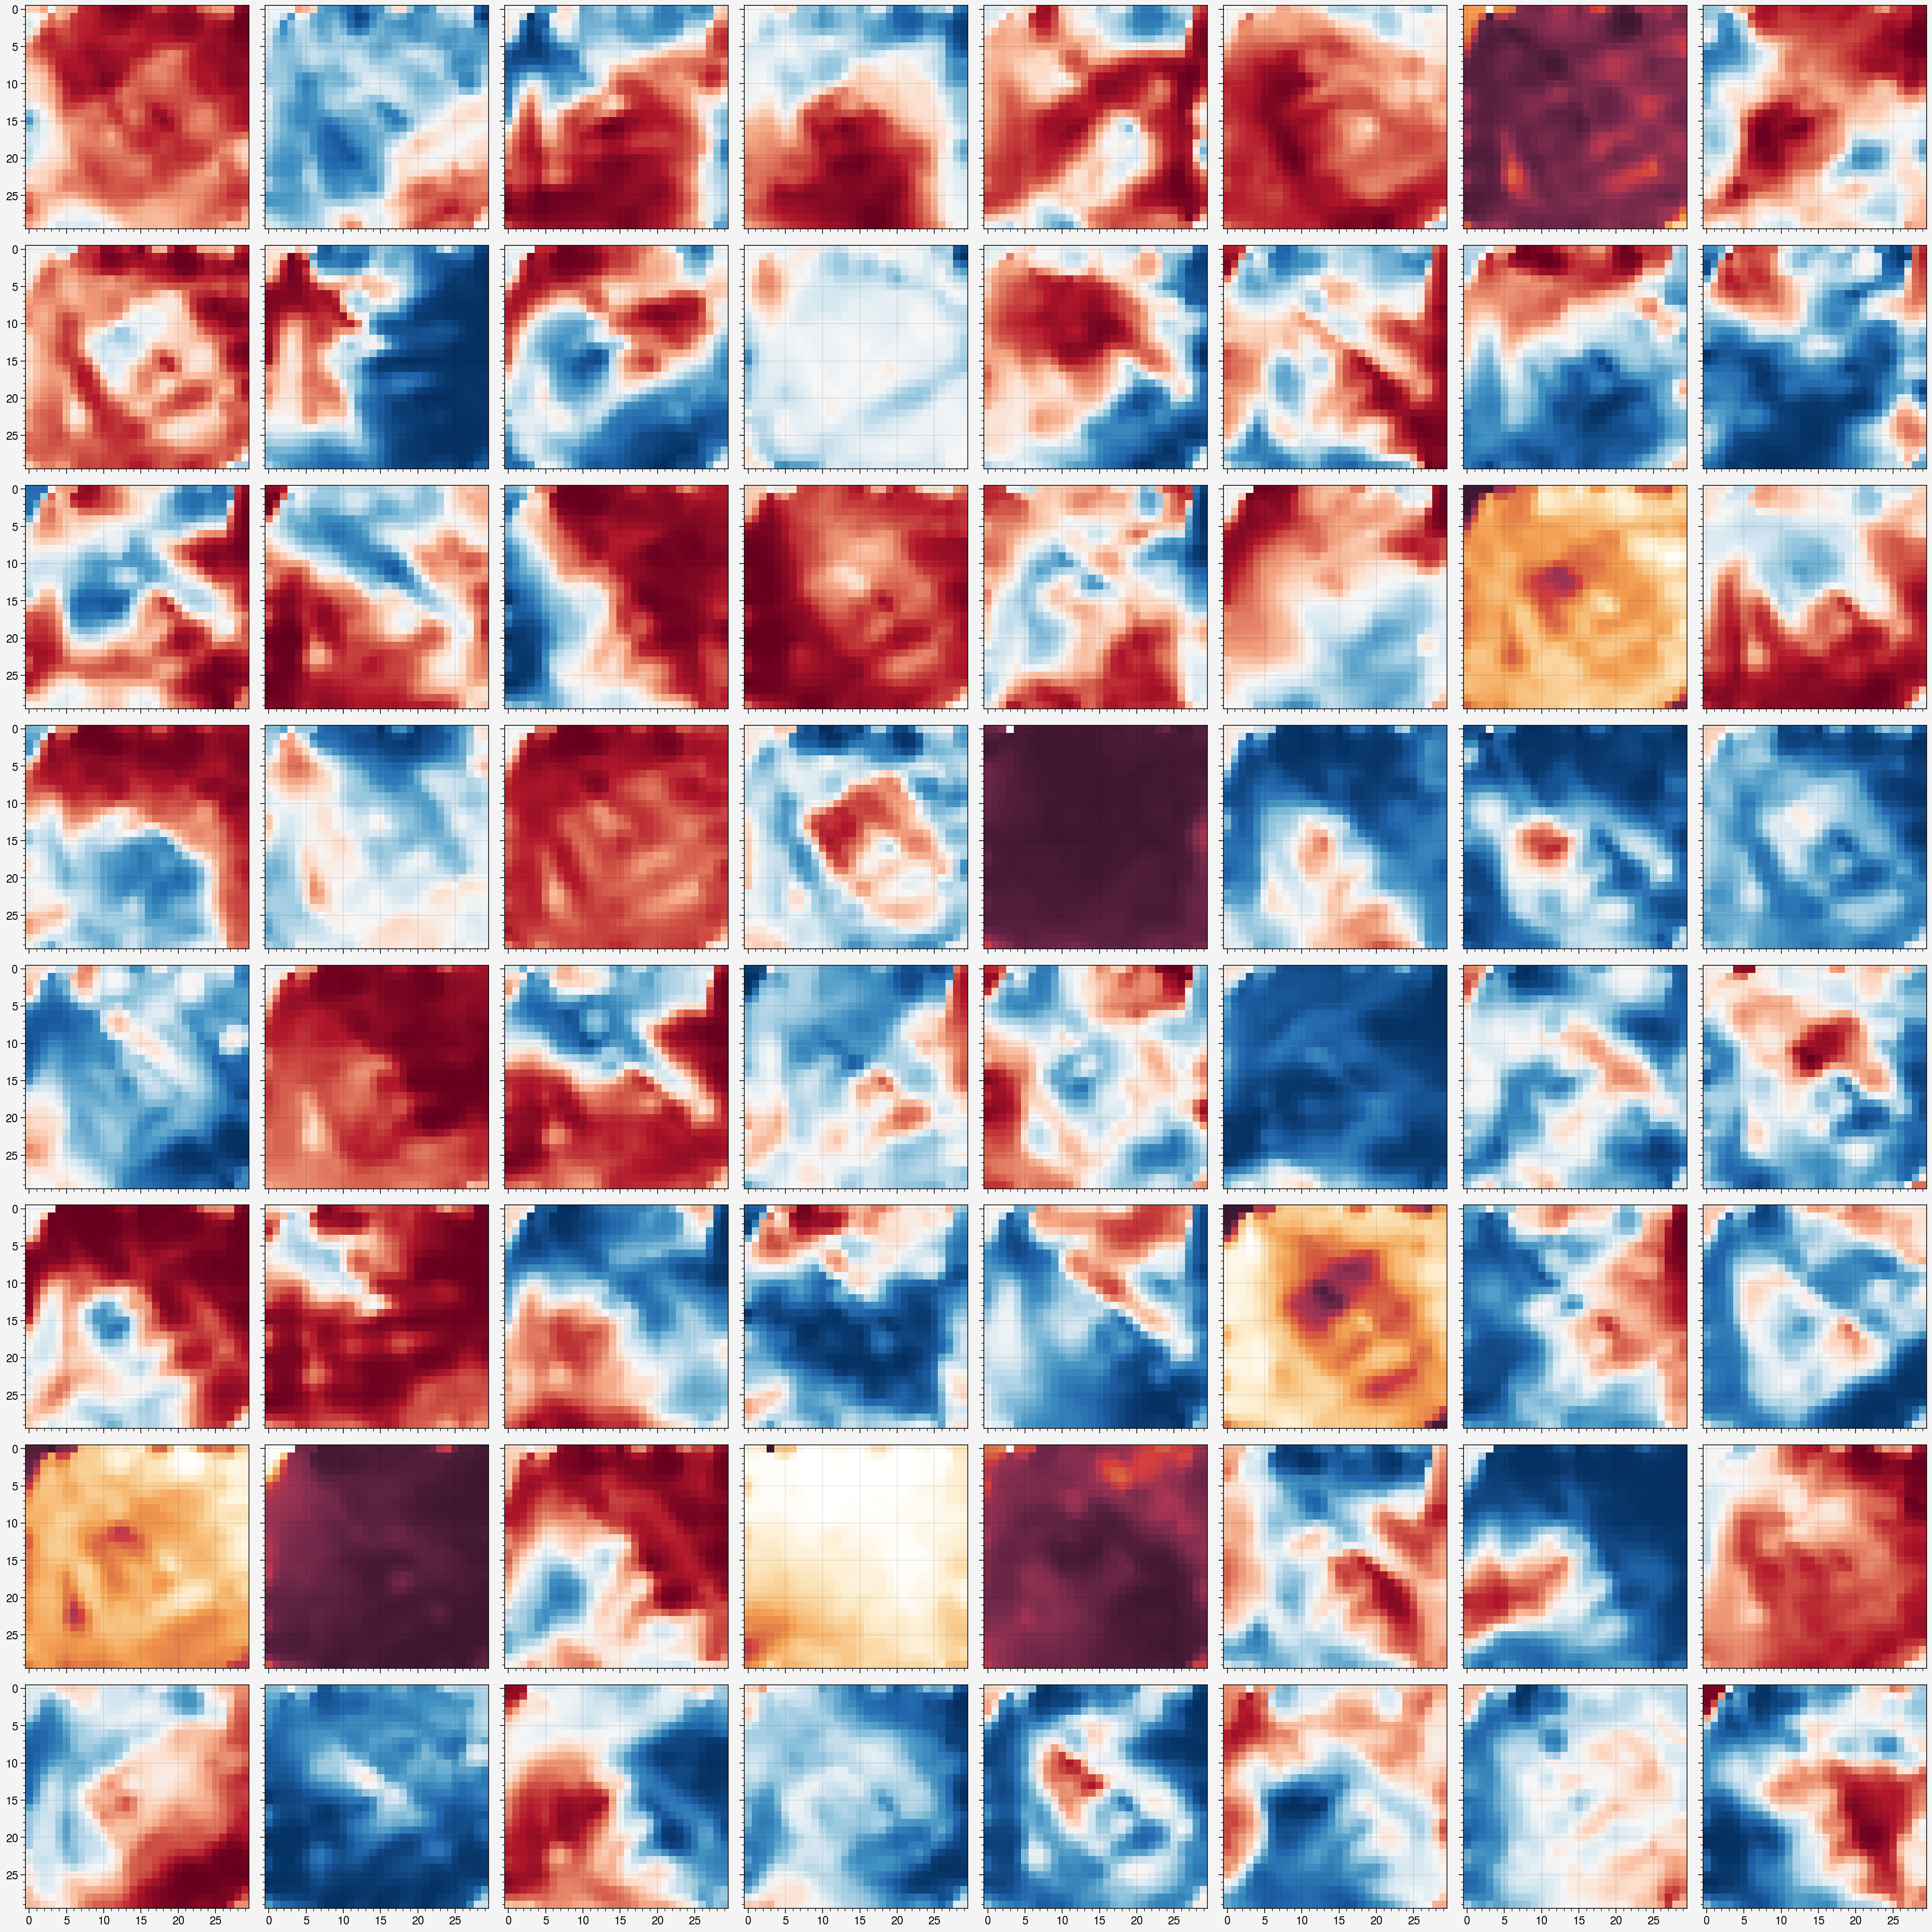

In [60]:
grid_points, grid_angles = pickle.load(open('data/explore/grid_starts', 'rb'))

obs = 2
trial = 1
exp_name = f'../saved_models/explorenav_pos/expl_goalpos_obs{obs}hidden64longer_t{trial}.pt'

print('Gathering data')
model, obs_rms = torch.load(exp_name)
env_kwargs = get_explore_kwargs(obs_set=2)
effs, trajs, ress = test_search_efficiency(model, obs_rms, env_kwargs=env_kwargs, manual_starts=[grid_points, grid_angles])
res = combine_evaluation_results(ress)
activs = ep_stack_activations(res, combine=True)
res['activations'] = activs
del res['envs']

print('Processing hms')
spatial_hms, angle_hms, _ = hm_process_res(res, angle_mod=False)

print('Plotting hms')
fig, ax = pplt.subplots(nrows=8, ncols=8)
for i in range(64):
    ax[i].imshow(spatial_hms[i])
    
pickle.dump(res, open(f'data/explore/256_{obs}_64_t{trial}_res', 'wb'))

Gathering data
Processing hms
Plotting hms


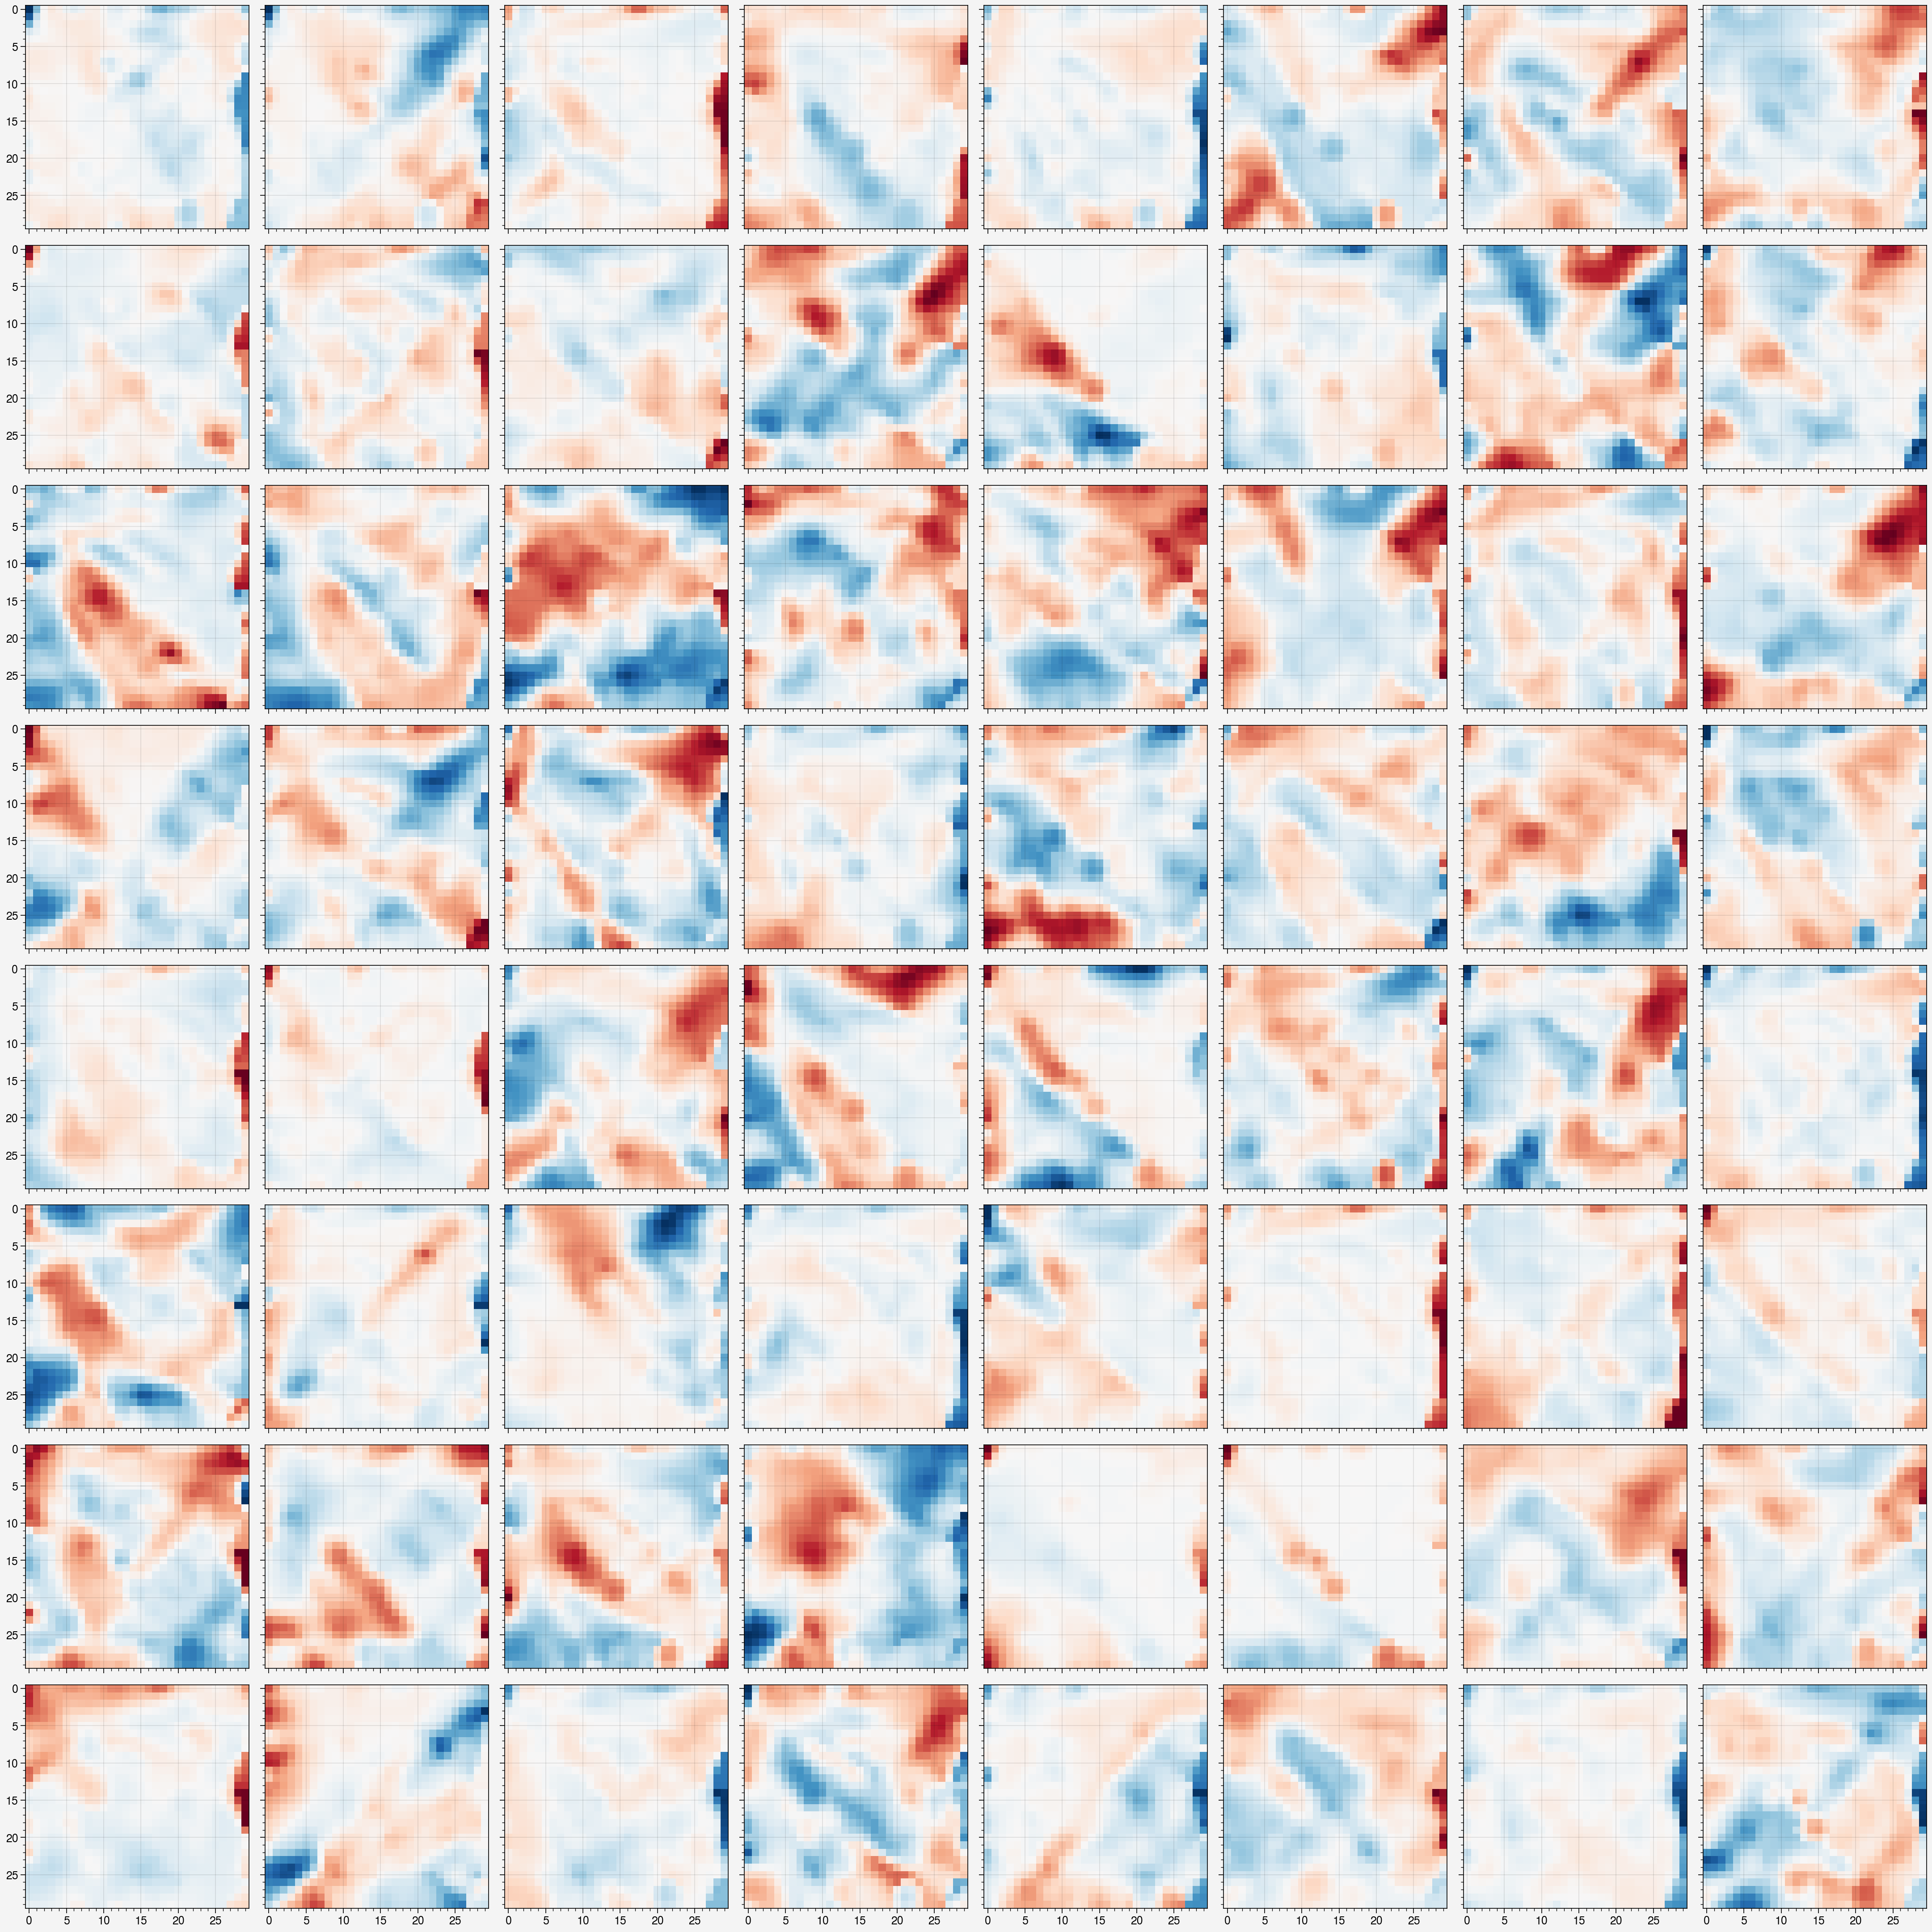

In [54]:
grid_points, grid_angles = pickle.load(open('data/explore/grid_starts', 'rb'))

obs = 2
trial = 2
exp_name = f'../saved_models/explorenav_pos/expl_goalpos_obs{obs}hidden64longer_t{trial}.pt'

print('Gathering data')
model, obs_rms = torch.load(exp_name)
env_kwargs = get_explore_kwargs(obs_set=2)
effs, trajs, ress = test_search_efficiency(model, obs_rms, env_kwargs=env_kwargs, manual_starts=[grid_points, grid_angles])
res = combine_evaluation_results(ress)
activs = ep_stack_activations(res, combine=True)
res['activations'] = activs
del res['envs']

print('Processing hms')
spatial_hms, angle_hms, _ = hm_process_res(res)

print('Plotting hms')
fig, ax = pplt.subplots(nrows=8, ncols=8)
for i in range(64):
    ax[i].imshow(spatial_hms[i])

Gathering data
Processing hms
Plotting hms


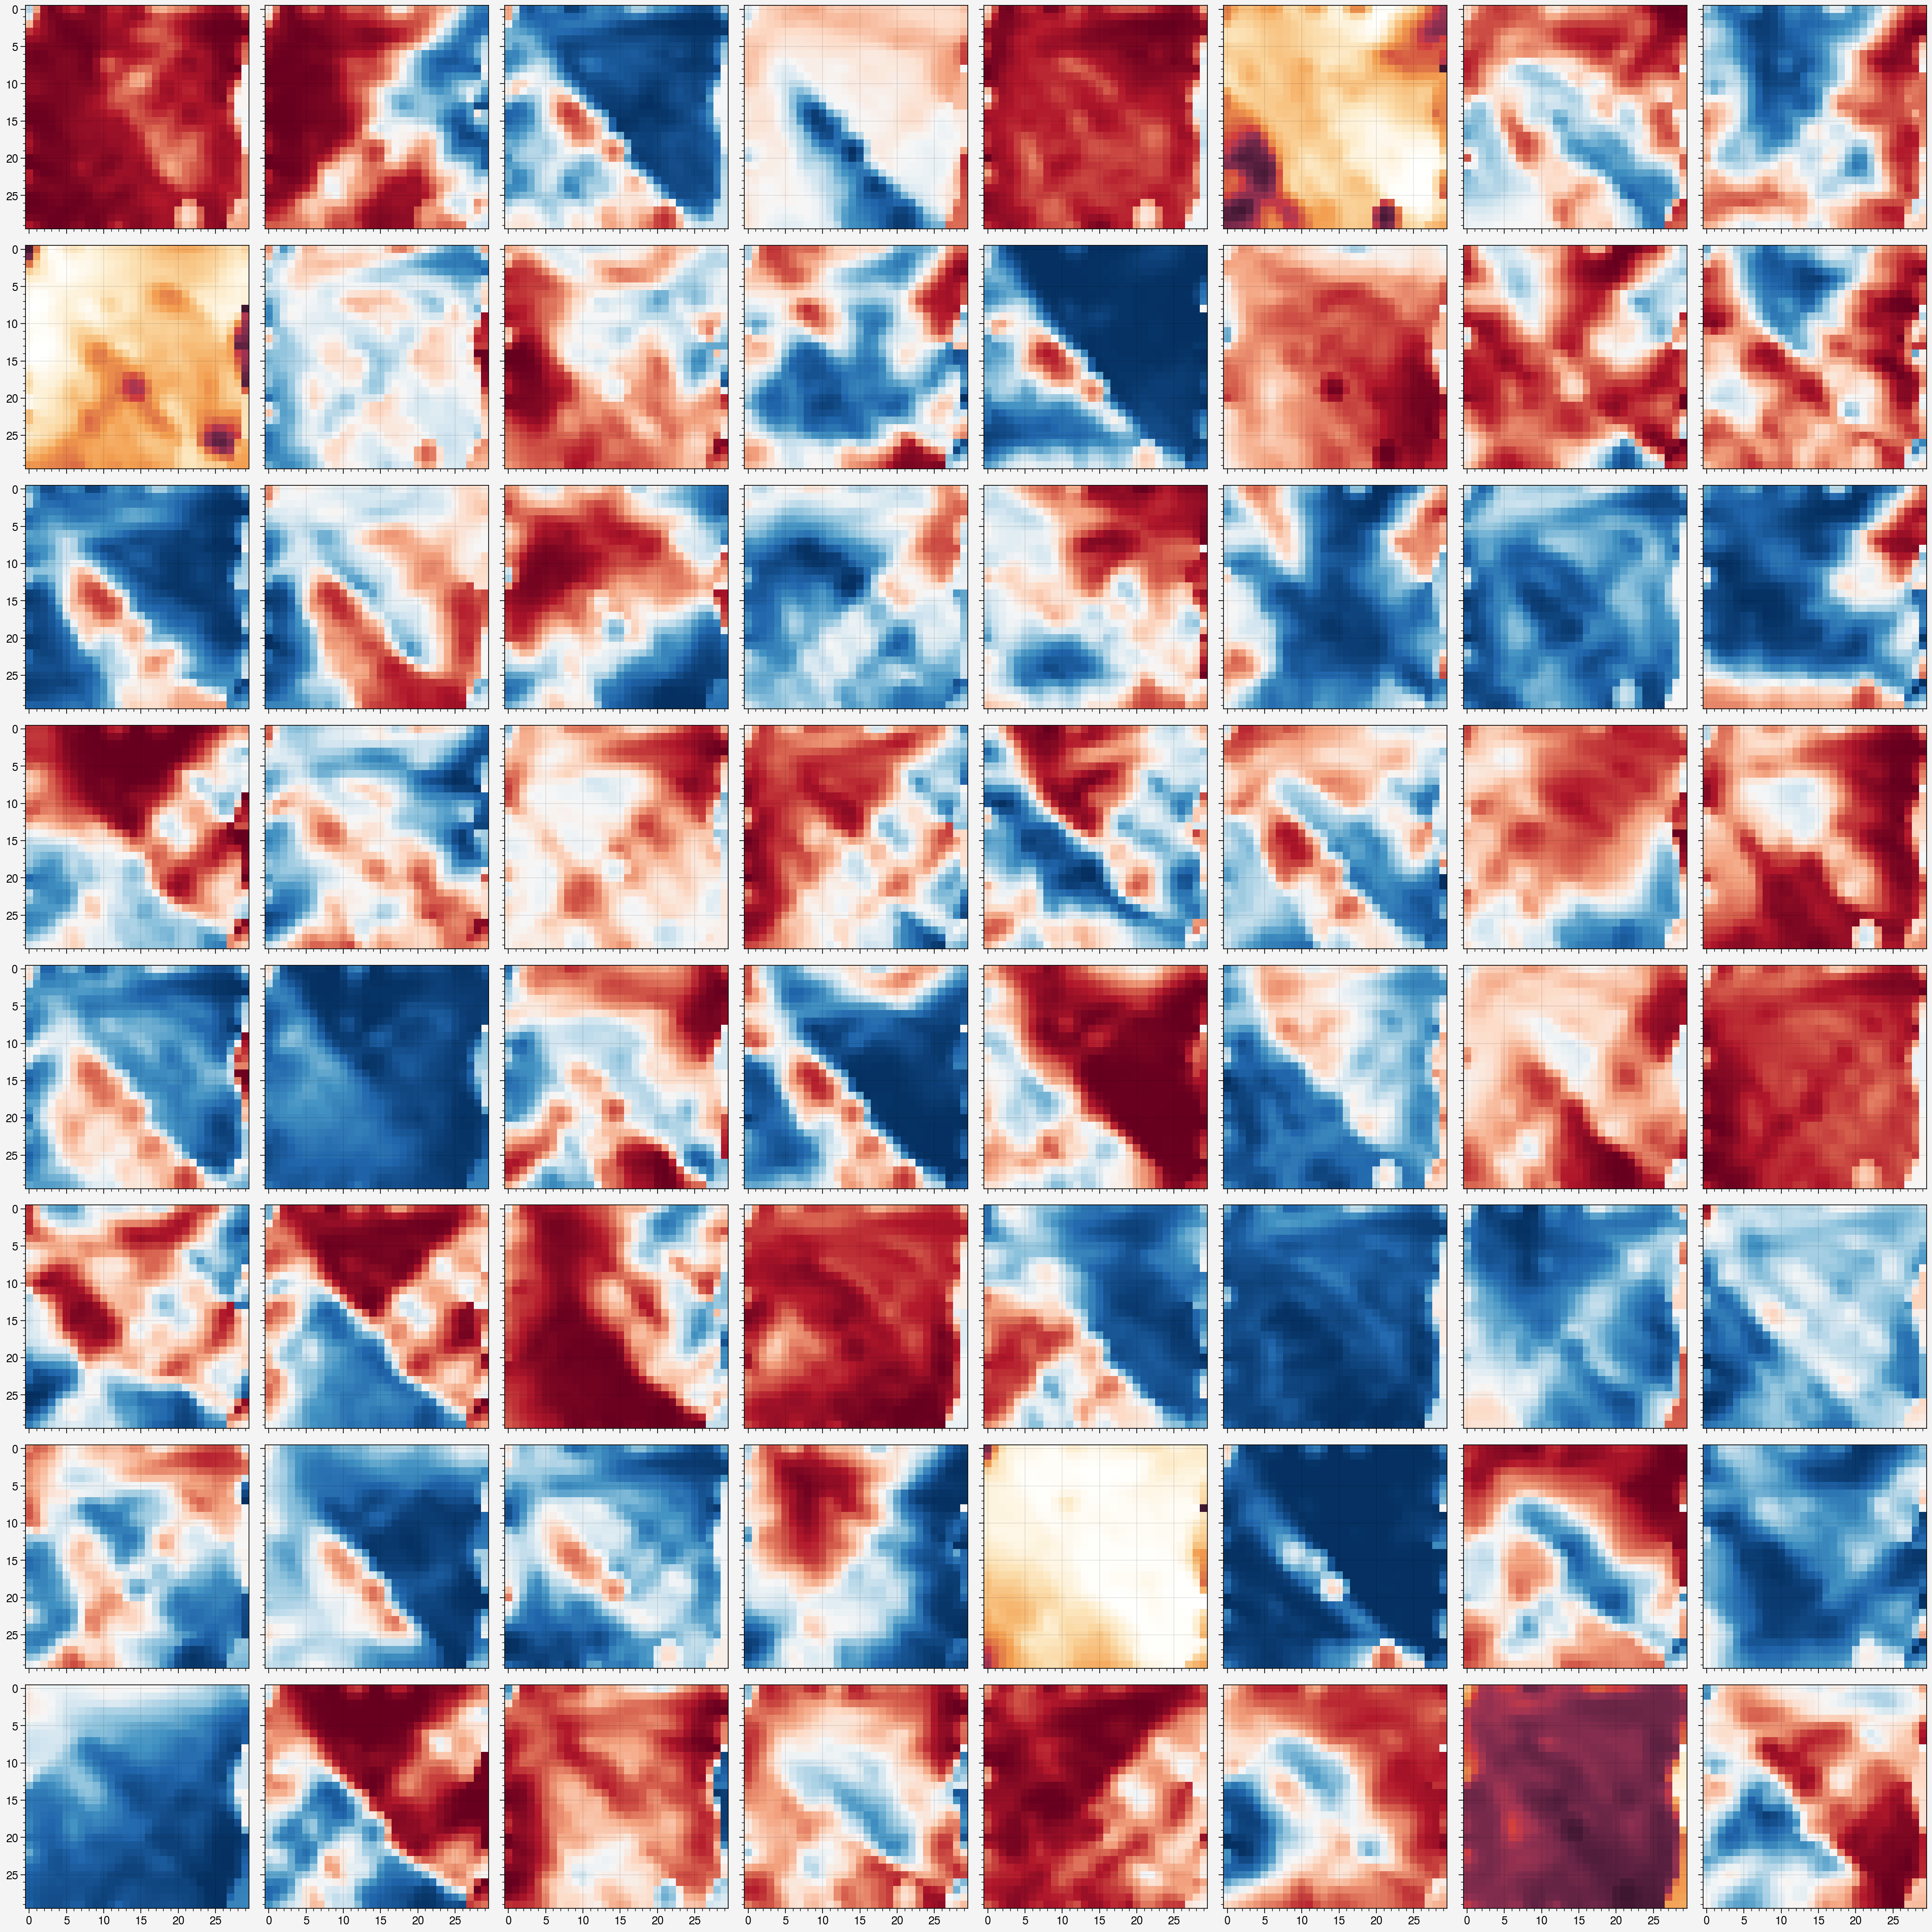

In [58]:
grid_points, grid_angles = pickle.load(open('data/explore/grid_starts', 'rb'))

obs = 2
trial = 2
exp_name = f'../saved_models/explorenav_pos/expl_goalpos_obs{obs}hidden64longer_t{trial}.pt'

print('Gathering data')
model, obs_rms = torch.load(exp_name)
env_kwargs = get_explore_kwargs(obs_set=2)
effs, trajs, ress = test_search_efficiency(model, obs_rms, env_kwargs=env_kwargs, manual_starts=[grid_points, grid_angles])
res = combine_evaluation_results(ress)
activs = ep_stack_activations(res, combine=True)
res['activations'] = activs
del res['envs']

print('Processing hms')
spatial_hms, angle_hms, _ = hm_process_res(res, angle_mod=False)

print('Plotting hms')
fig, ax = pplt.subplots(nrows=8, ncols=8)
for i in range(64):
    ax[i].imshow(spatial_hms[i])

In [59]:
pickle.dump(res, open(f'data/explore/256_{obs}_64_t{trial}_res', 'wb'))

In [79]:
g = 32
k = 0.17
t = 146
H = 35000
v = g/k * (np.exp(-k*t) - 1)
h = g/k * (np.exp(-k*t)/k - t) + H - g/k**2

In [80]:
h

6410.3806228557805

In [81]:
v

-188.23529411451727

In [82]:
t - h/v

180.05514705948758

In [117]:
g = 32
k = 0.17
t = 150
H = 35000
v = -g/k * (1 - exp(-k*t))
h = -g/k * (t - exp(-k*t)/k) + H + g/k**2

In [118]:
h

36107.26643598616

In [119]:
v

-188.23529411606145

In [120]:
t - h/v

341.8198529427923

In [104]:
exp = np.exp

In [133]:
x = np.sqrt(5)
-2 / (1 + (2/x)**2) / (x**2) * -600 / 60

2.222222222222222

In [135]:
res = pickle.load(open('data/shortcut/wc4_copied/64_0.1_0', 'rb'))

In [141]:
angle

array([-0.40638139, -0.10638139,  0.19361861, ..., -0.11452194,
       -0.11452194, -0.11452194])

(Figure(nrows=1, ncols=1, refwidth=2.5),
 SubplotGrid(nrows=1, ncols=1, length=1))

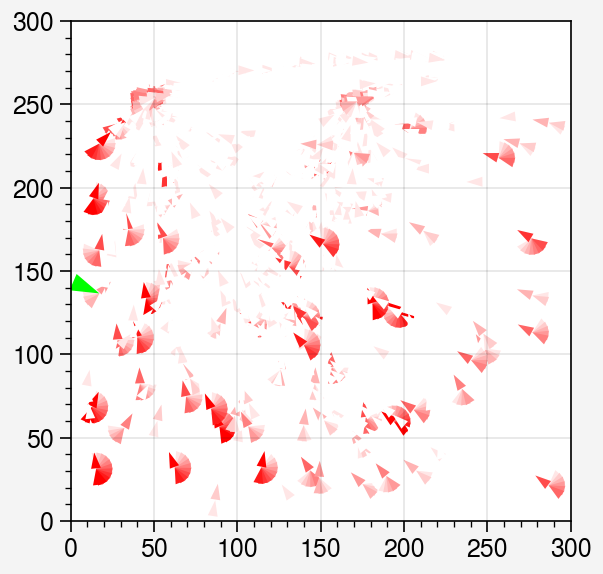

In [142]:
pos = res[-1]['pos']
angle = res[-1]['angle'].reshape(-1, 1)
draw_trajectory(pos, angle)

In [146]:
activ2d = res[-1]['activ2d']

In [148]:
labels, no_cluster = decompose_shortcut_trajectories(res[-1])

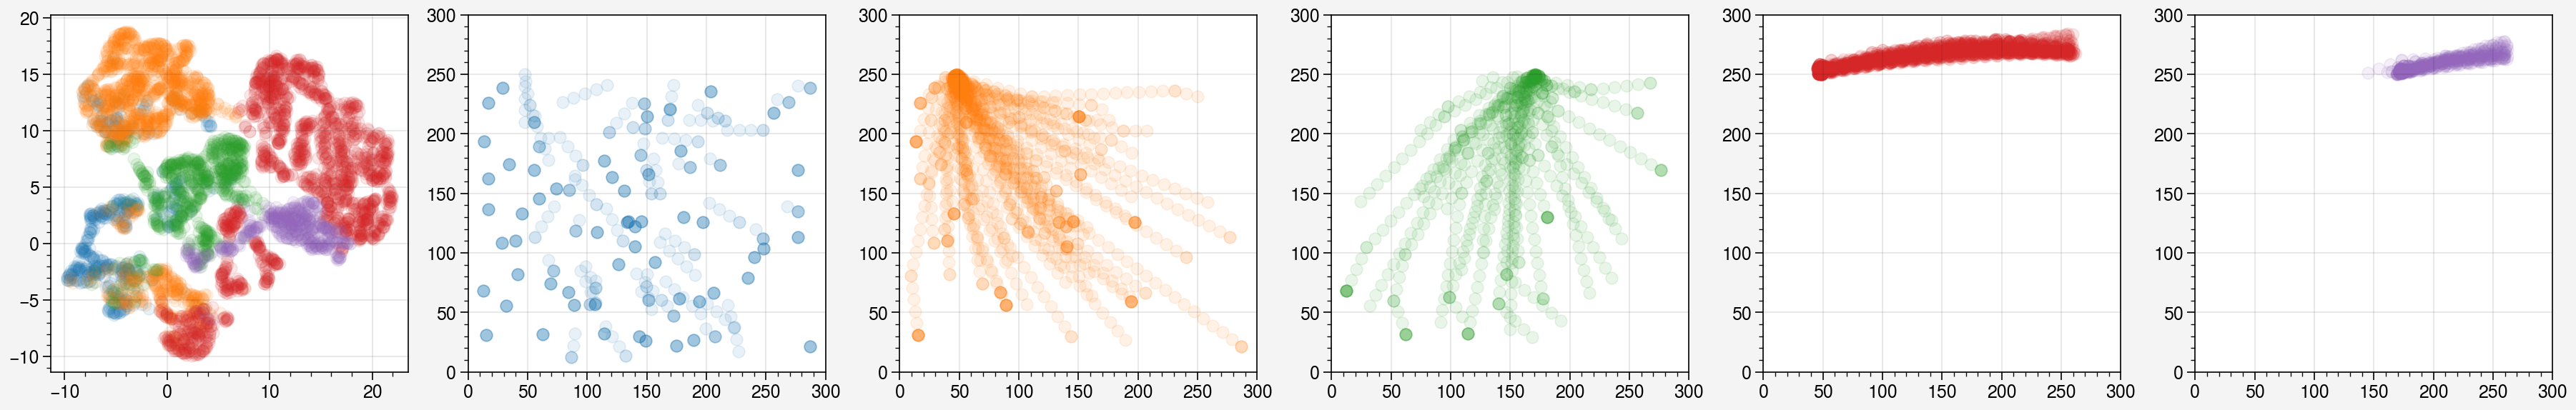

In [149]:
kmeans_activ_pos_plot(pos, activ2d, labels=labels)

In [150]:
two_set_silhouette_score(activ2d[labels == 1], activ2d[labels == 2])

0.24161884

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:05<00:00,  1.80s/it]


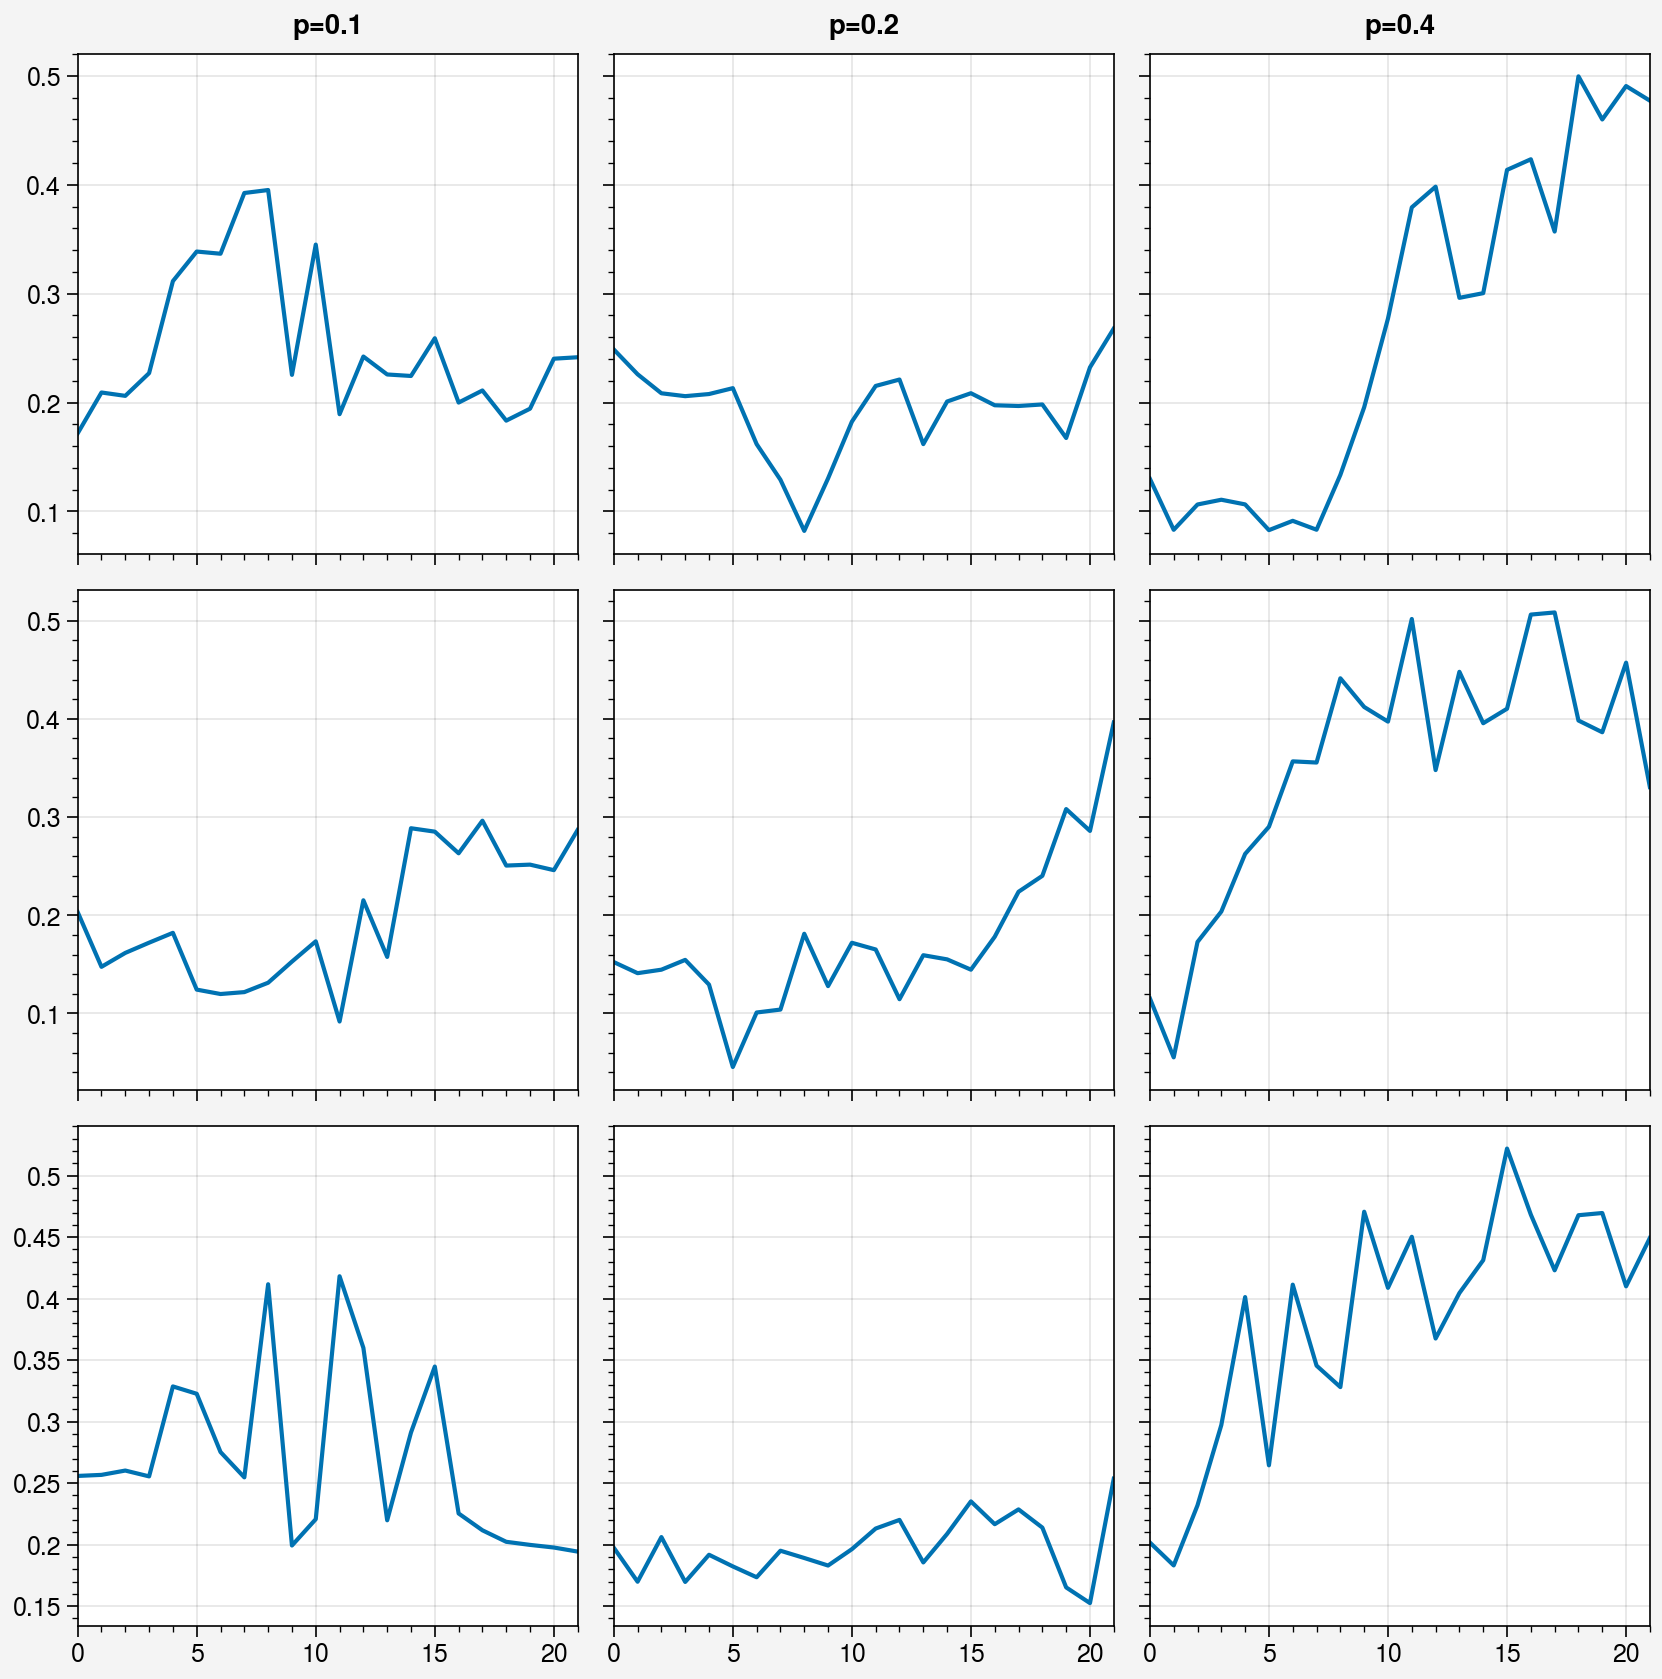

In [162]:
fig, ax = pplt.subplots(ncols=3, nrows=3)
probs = [0.1, 0.2, 0.4]
for m, p in enumerate(probs):
    for t in tqdm(range(3)):
        key = f'64_{p}_{t}'
        res = pickle.load(open(f'data/shortcut/wc4_copied/{key}', 'rb'))

        ys = []
        for i in range(len(res)):
            activ2d = res[i]['activ2d']
            labels, no_cluster = decompose_shortcut_trajectories(res[i])
            score = two_set_silhouette_score(activ2d[labels == 1], activ2d[labels == 2])
            ys.append(score)

        ax[t, m].plot(np.arange(len(ys)), ys)
        
ax.format(toplabels=[f'p={p}' for p in probs])
    

In [156]:
all_shortcut_use = pickle.load(open('data/shortcut/shortcut_wc4_userates', 'rb'))

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 750.68it/s]


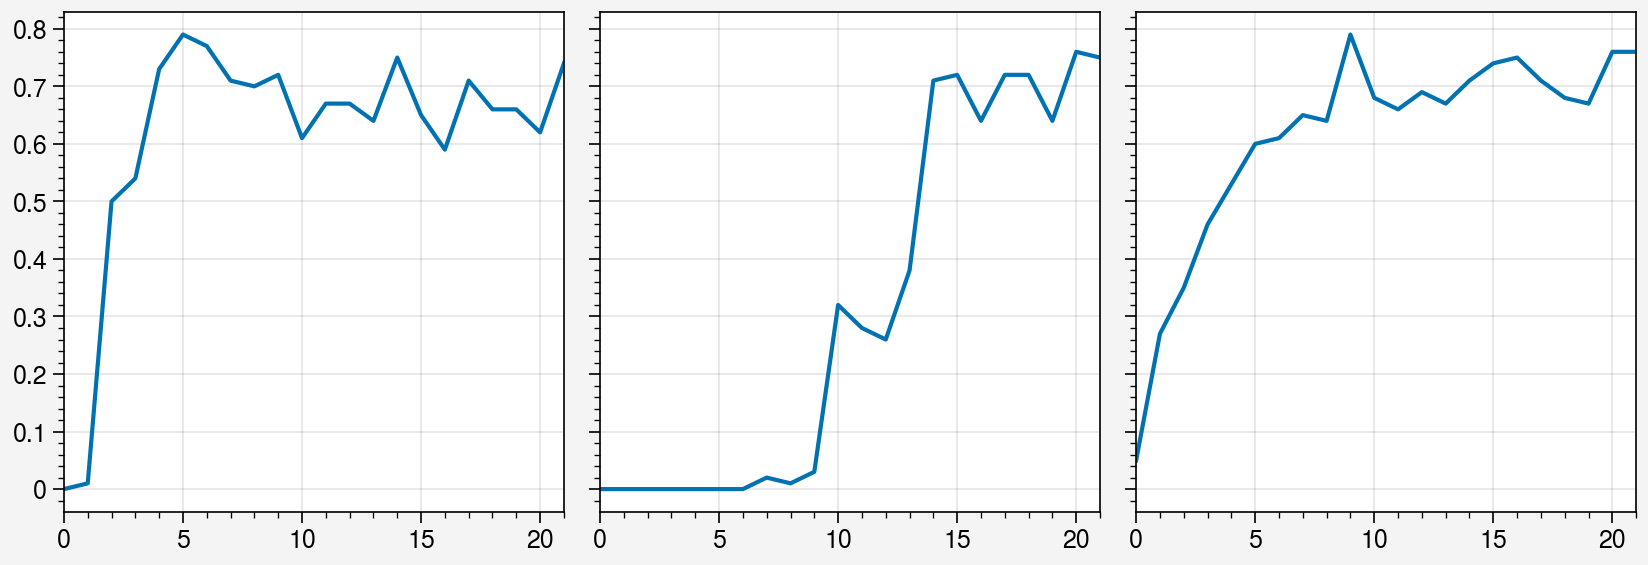

In [161]:
fig, ax = pplt.subplots(ncols=3)

for t in tqdm(range(3)):
    key = f'64_0.1_{t}'
    
    ys = []
    for i in range(len(res)):
        score = all_shortcut_use[key][i]
        ys.append(score)
    
    ax[t].plot(np.arange(len(ys)), ys)
    

<a list of 1 Line2D objects>

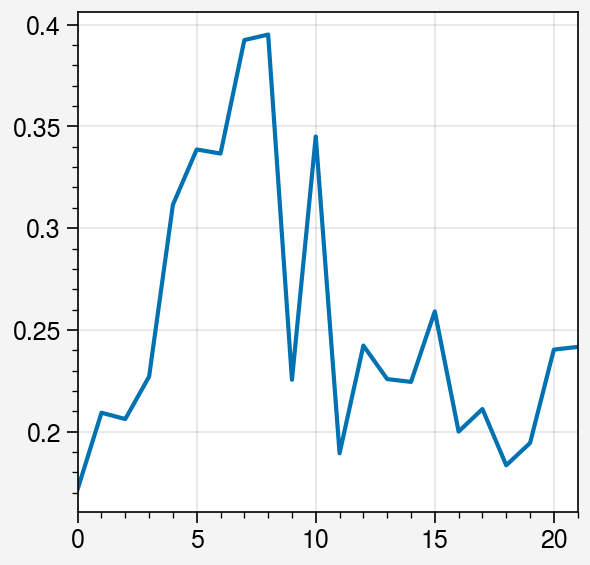

In [153]:
fig, ax = pplt.subplots()
ax.plot(np.arange(len(ys)), ys)


In [165]:
model

Policy(
  (base): DelayedRNNPPO(
    (gru): GRU(64, 64)
    (shared0): Sequential(
      (0): Linear(in_features=84, out_features=64, bias=True)
      (1): Tanh()
    )
    (critic0): Sequential(
      (0): Linear(in_features=64, out_features=64, bias=True)
      (1): Tanh()
    )
    (critic1): Sequential(
      (0): Linear(in_features=64, out_features=64, bias=True)
      (1): Tanh()
    )
    (actor0): Sequential(
      (0): Linear(in_features=64, out_features=64, bias=True)
      (1): Tanh()
    )
    (actor1): Sequential(
      (0): Linear(in_features=64, out_features=64, bias=True)
      (1): Tanh()
    )
    (critic_head): Linear(in_features=64, out_features=1, bias=True)
  )
  (dist): Categorical(
    (linear): Linear(in_features=64, out_features=4, bias=True)
  )
)

In [166]:
make_vec_envs

<function ppo.envs.make_vec_envs(env_name, seed=None, num_processes=1, gamma=0.99, log_dir=None, device=device(type='cpu'), allow_early_resets=True, num_frame_stack=None, capture_video=False, normalize=True, env_kwargs={}, auxiliary_tasks=[], auxiliary_task_args=[], video_folder='./video')>

In [273]:
envs = make_vec_envs('ShortcutNav-v0', None, 2, env_kwargs={'wall_colors': 1.5,
                                                           'shortcut_probability': 0.1,
                                                           'character_reset_pos': 3},
                    normalize=False)

In [274]:
envs.obs_rms.mean

AttributeError: 'SubprocVecEnv' object has no attribute 'obs_rms'

In [280]:
envs.reset()

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000,
         0.3327, 0.3095, 0.2912, 0.2768, 0.2654, 0.2567, 0.2503, 0.3630, 0.3590,
         0.3576, 0.3587, 0.3452],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.

In [172]:
envs.training

True

In [192]:
actor_critic = Policy(
    envs.observation_space.shape,
    envs.action_space,
    base='DelayedRNNPPO',
    base_kwargs={'recurrent': True})


In [196]:
clone_actor_critic, obs_rms = torch.load('../saved_models/shortcut_wc/shortcut_wc1p0.4_t0.pt')

In [203]:
clone_layers = ['gru', 'shared0']
for name in clone_layers:
    copy_params = list(getattr(clone_actor_critic.base, name).parameters())
    paste_params = list(getattr(actor_critic.base, name).parameters())
    for i in range(len(copy_params)):
        paste_params[i].data.copy_(copy_params[i].data)


In [210]:
params = list(getattr(actor_critic.base, 'gru').parameters())

In [214]:
params[0].requires_grad = False

In [216]:
envs.obs_rms = obs_rms

In [218]:
envs.training = False

In [253]:
envs.training

False

In [252]:
envs.eval()

In [268]:
envs.obs_rms.mean

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [267]:
envs.reset()

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000,
         0.1994, 0.2052, 0.2129, 0.2228, 0.2354, 0.2513, 0.4338, 0.4021, 0.3771,
         0.3574, 0.3419, 0.3299],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.

In [285]:
for trial in range(3):
    model, obs_rms = torch.load(f'../saved_models/shortcut_wc/shortcut_nonorm_wc4p0.4_t{trial}.pt')
    shortcut_use = test_shortcut_use_rate(model, obs_rms)
    print(shortcut_use)

0.8
0.07
0.88


In [287]:
for trial in range(3):
    model, obs_rms = torch.load(f'../saved_models/shortcut_wc/shortcut_nonorm_wc1.5p0.4_t{trial}.pt')
    shortcut_use = test_shortcut_use_rate(model, obs_rms, env_kwargs={'wall_colors': 1.5})
    print(shortcut_use)

0.18
0.15
0.01


In [284]:
shortcut_use

0.76